# EDA

# 0. Training project objective

To find out the effect of different living conditions for students aged 15 to 22 on the result of exam in mathematics. This should help to identify students at risk at early stage.

For this purpose, a model will be created that predicts the results of the exam for each student.

Here I should **perform an Exploratory Data Snalysis (EDA)**, which will help to create the model and define its parameters.


## My personal objective:

- **to compose initial version of EDA template** for further application. Therefore it should be as comprehensive as possible, even if it is be excessive for training project purposes.

<div style="border:solid blue 2px; padding: 20px"> <h1 style="color:blue; margin-bottom:20px">EDA template</h1>

## Goals of EDA:

1. Check data quality and clean it if necessary.
2. Explore data.
3. Keep as many entities as possible
4. Make assumptions and formulate hypotheses for the further construction of the model.



## Main actions:

1. Load data
  - Check column names
2. Get a general sense about data
    - `info(memory_usage='deep')`
    - check *dtypes* (*float*, *int*, *object*, *datetime*, *category*)
    - change *dtypes* if necessary (here or after, particularly to decrease used memory volume)
    - define target feature(s)
3. Check: Do your data have:
  - duplicates
  - missing values
    - target is first !
4. Explore feature distributions, detect outliers/anomalies
  1. Sort features as:
    - `numerical`
    - `categorical` and amongst them:
       - `ordinal`
       - `one-hot`, and `binary` in particular.
  2. Numerical: 
    - `sns.boxplot()`: anomaly detection
    - `sns.distplot()`: distribution
    - `sns.scatterplot()` for `feature`/`target`: dependencies
    - basic statistics `.describe()` (*mean*, *std*, *min*, *max*, *quartiles*)
    - Pearson coefficient of linear correlation for `feature`/`target` pair
    - number of missing values
  3. Categorical:
    1. Number of unique values (`.nunique()`).
    2. Ordinal:
       - `sns.barplot()`: distribution of classes, class imbalance visualization
       - `sns.boxplot()` for each class: anomaly detection inside each class
       - `sns.kdeplot()` for each class: class comparison (`sns.distplot()` appears to be less informative)
       - Pearson coefficient of linear correlation for `feature`/`target` pair
       - table of target counts for each class: anomaly detection, class frequency
       - number of missing values
    3. One-hot:
       - `sns.barplot()`: class frequency, class balance visualization
       - `sns.boxplot()` for each class: anomaly detection inside each class
       - `sns.distplot()` for each class:
       - table of target counts for each class: anomaly detection, class frequency
       - basic statistics `.describe()` (*mean*, *std*, *min*, *max*, *quartiles*) for each class and *mean* and *std* of these parameters: class distribution comparison
       - class imbalance evaluation
       - number of missing values
5. Correlation matrix
6. Choose data for model
  1. Drop useless features
  2. Missing values and anomalies should be
    - substituted 
       - with constant value
       - within modelling distribution
    - dropped
7. Perform previous tasks again and again until you get appropriate result, may be even on stage of model construction.
8. And May the 4th be with you!


## NB

- Maintain list of DataFrames and Lists with their descriptions

<div style="border:solid magenta 2px; padding: 20px"> <h1 style="color:magenta; margin-bottom:20px">To do:</h1>
    
- improve some functions
    - `num_variable_analysis`
    - `ordinal_variable_analysis`
    - `one_hot_variable_analysis`
        - *maybe combine these three function in one class*
    - `distrib_equality`
    - `best_fit_distribution` (ver.2: bins not from histogram)
    - `discrete_feature_impute`
- add new functions:
    - `corr_matrix_heatmaps` (plot 3 heatmaps of corr_matrix: full, low absolute values, high absolute values)
    - `class_imbalance_detect`  
- make a description for each function
- put them as individual `.py` files

### Description of data

1. `school` — school name abbreviation

2. `sex` — ('F' - female, 'M' - male)

3. `age` — (from 15 to 22)

4. `address` — place of residence ('U' - urban, 'R' - rural)

5. `famsize` — family size ('LE3' <= 3, 'GT3' >3)

6. `Pstatus` — parental cohabitation status ('T' - together, 'A' - apart)

7. `Medu` — education of mother (0 - no, 1 - 4 years, 2 - 5-9 years, 3 - 11 years or college, 4 - university)

8. `Fedu` — education of father (0 - no, 1 - 4 years, 2 - 5-9 years, 3 - 11 years or college, 4 - university)

9. `Mjob` — job of mother ('teacher', 'health' - health care, 'services' - civil service, 'at_home' - does not work, 'other')

10. `Fjob` — job of father ('teacher', 'health' - health care, 'services' - civil service, 'at_home' - does not work, 'other')

11. `reason` — reason for choosing school ('home' - proximity to home, 'reputation' - school reputation, 'course' - school educational program, 'other')

12. `guardian` — ('mother', 'father', 'other')

13. `traveltime` — travel time to school (1 - <15 min, 2 - 15-30 min, 3 - 30-60 min, 4 - >60 min)

14. `studytime` — study time beyond school per week (1 - <2 hours, 2 - 2-5 hours, 3 - 5-10 hours, 4 - >10 hours)

15. `failures` — number of non-study failures (n, if 1<=n<3, else 0)

16. `schoolsup` — additional educational support (yes or no)

17. `famsup` — family educational support (yes or no)

18. `paid` — additional paid classes in mathematics (yes or no)

19. `activities` — extracurricular activities (yes or no)

20. `nursery` — attended kindergarten (yes or no)

21. `studytime, granular` - **feature without description**

22. `higher` — wants to obtain higher education (yes or no)

23. `internet` — internet at home (yes or no)

24. `romantic` — in a romantic relationship (yes or no)

25. `famrel` — family relationship (from 1 - very bad to 5 - very good)

26. `freetime` — free time after school (from 1 - very little to 5 - very much)

27. `goout` — spending time with friends (from 1 - very little to 5 - very much)

28. `health` — current health state (from 1 - very bad to 5 - very good)

29. `absences` — number of missed classes

30. `score` — math exam score

**Target feature** is `score` and it is numerical. Therefore we have **regeression problem**.

# 1 Libraries import and data loading

In [1]:
# Import

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

from sklearn.preprocessing import OrdinalEncoder

In [2]:
total_time_start = time.time()

In [3]:
### Global constants and settings

FILEPATH = 'D:\\Data_Science_0\\Data_Science_=_Skill_Factory\\Real_DS_=_2_EDA\\'

# Plotting

sns.set(style='darkgrid', palette="bright")
sns.set(font_scale = 1.25)

FONT_SIZE = 14

In [4]:
data = pd.read_csv(FILEPATH + 'stud_math.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


# 2 General information

In [5]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Let's take a look at feature names - do they have spaces or other improperties.

In [6]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

What data does the feature without description contain?

In [7]:
data['studytime, granular'].value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

The dataset has only 395 entities - there are not so many as we want - and 30 features. Most of features have missing values.

There is a feature `studytime, granular` without description. The values of this features are numerical from the range: [-12, -9, -6, -3].

## 2.1 Duplicates and missing values

How many duplicates in the dataset:

In [8]:
print("There are {} duplicates.".format( data.duplicated().sum() ))

There are 0 duplicates.


We start with the detection of missing values in the target feature (`score`). We need reliable data here, therefore the strategy is simple - find missing values and delete these rows.

In [9]:
print("The target has {} missing values.".format( data['score'].isna().sum() ))

The target has 6 missing values.


In [10]:
data.dropna(subset=['score'], inplace=True)
print("Now we have {} entities.".format( len(data) ))

Now we have 389 entities.


And now detect missing values in other features.

In [11]:
data.isna().sum()

school                  0
sex                     0
age                     0
address                15
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 38
paid                   39
activities             14
nursery                15
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime                9
goout                   7
health                 15
absences               11
score                   0
dtype: int64

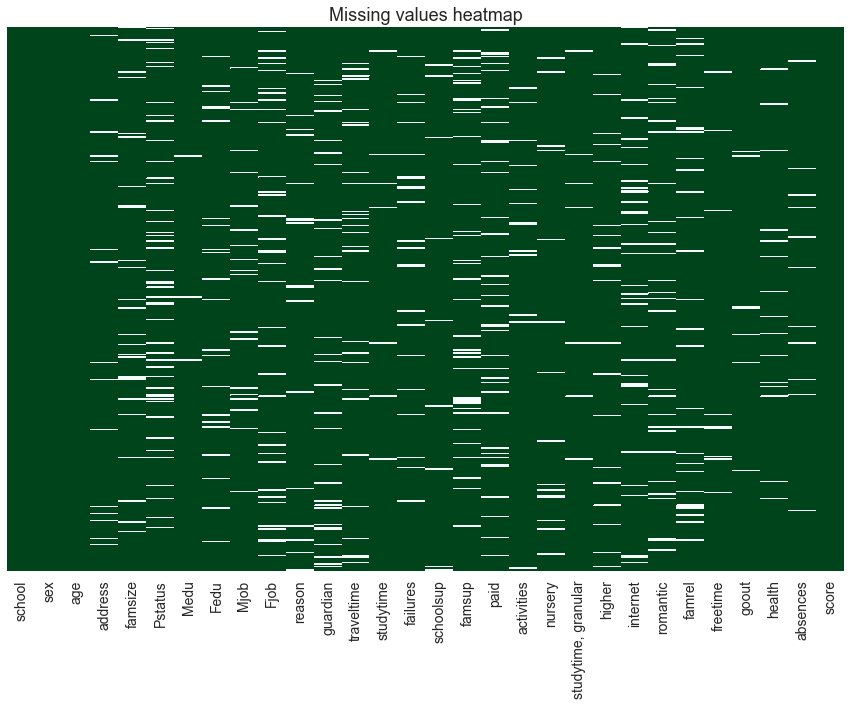

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
cmap = sns.diverging_palette(20, 275, s=80, as_cmap=True)

sns.heatmap(data.isna(), cmap='BuGn_r', cbar = False, yticklabels=False)

plt.xticks(fontsize=FONT_SIZE)
axes.set_title("Missing values heatmap", fontsize=FONT_SIZE+4)
axes.tick_params(axis='y', length=0)#, bottom=False)

In [13]:
print("Maximal amount of missing values ({}, i.e. {:.1%}) is in the '{}'.".format( data.isna().sum().max(), 
                                                                                  data.isna().sum().max()/len(data),
                                                                                  data.isna().sum().idxmax() ))

Maximal amount of missing values (45, i.e. 11.6%) is in the 'Pstatus'.


Maximal portion of missing values is 11.6%, that is  quite a few for our dataset. And missing values are distributed continiously over entities. To figure out what we should do with missing values (fill missing values or drop the corresponding feature) we should
- Investigate correlation between the feature and the target. Maybe some features do not affect the target and we can drop them.
- Investigate the values of features. Maybe we can figure out how to fill missing values.
- Investigate distribution of the feature. Maybe we can figure out how to fill missing values.
- Investigate (if it is possible $^1$) possible multicollinearity.

$^1$: We should keep in mind that comprehensive investigation includes $N_f(N_f-1)/2$ `feature[i]`/`feature[j]` pairs.

In [14]:
N_f = data.columns
print("There are {} possible pairs of features.".format( int(len(N_f)*(len(N_f)-1)/2) ))

There are 435 possible pairs of features.


# 3 Feature exploration

Let us define which features are:
- numerical
- categorical, and amongst them
  - ordinal
  - binary
  - other ('one-hot')

In [15]:
features_set = set(data.columns[:-1])

features_numerical = ['age', 'absences']
features_numerical_set = set(features_numerical)

features_categorical_set = features_set - features_numerical_set
features_categorical = list(features_categorical_set)

features_ordinal = ['Medu', 'Fedu', 'traveltime', 'studytime', 'studytime, granular',
                    'famrel', 'freetime', 'goout', 'health']
features_ordinal_set = set(features_ordinal)

features_one_hot_set = features_categorical_set - features_ordinal_set
features_one_hot = list(features_one_hot_set)


print("There are {} variables.".format( len(features_set) ))
print("There are {} numerical variables.".format( len(features_numerical) ))
print("There are {} categorical variables, amongst them:\n    {} ordianal variables and\n    {} 'one-hot' variables.".
      format( len(features_categorical_set), len(features_ordinal), len(features_one_hot) ))

There are 29 variables.
There are 2 numerical variables.
There are 27 categorical variables, amongst them:
    9 ordianal variables and
    18 'one-hot' variables.


Ordinal features should be coded with `OrdinalEncoder` from `sklearn.preprocessing`.
'One-hot' features should be coded with `get_dummies` from `pandas`. In contrary to `OrdinalEncoder` from `sklearn.preprocessing` here we can exclude one value to avoid the dummy-variable-trap using `drop_first` parameter.

The feature `failures` is defined as a number of non-study failures ($n, \,{rm if}\, 1\leq n<3, \,{\rm else}\, 0$). But in both cases (if a number of failures is `0` or contrary more than `3`) value will be equal to `0`. It is not an `ordinal`, but an `one-hot` feature. Both if you have many failures or don't have them at all, you will have the same value of feature.

We **change dtype** when we somehow eliminate missing values, since `astype()` do not like them.

### 3.0.0 Function for analysis of numerical variables

It is convenient to create a function for analysis of numerical data, which
- plot `sns.boxplot()` to detect anomalies/outliers;
- plot distribution with `sns.distplot()`;
- plot `sns.scatterplot()` for `feature`/`target` pair to find out some kind of dependencies;
- calculate basic statistic indicators with `.describe()` (*mean*, *std*, *min* and *max*, *quartiles*);
- calculate the number of missing values;
- calculate Pearson coefficient of linear correlation for `feature`/`target` pair.

In [16]:
def num_variable_analysis(df, item, target_name, n_bins=100):
    if item != target_name:
        fig, axes = plt.subplots(1, 3, figsize=(15, 10))
    else:
        fig, axes = plt.subplots(1, 2, figsize=(15, 10))
    
    
    # ==== FIG 1 (boxplot)    
    df.boxplot(column=item, ax=axes[0])
    axes[0].set_title(item, fontsize=FONT_SIZE)

    
    # ==== FIG 2 (distplot)
    sns.distplot(df[item], bins=n_bins, kde=True, ax=axes[1], vertical=True)
    axes[1].set_title(item, fontsize=FONT_SIZE)
    plt.xticks(rotation=45)
    # axes.set_xlim((0, 100))
    
    
    # === FIG 3 (scatterplot)
    if item != target_name:
        axes[2] = sns.scatterplot(x=item, y=target_name, data=df)
    
    
    # === Descriptive statistics
    describer = pd.DataFrame(df[item].describe()).T    
    print("==== {} ====".format(item))
    print(describer, "\n")
    
    
    # Pearson correlation coefficient for feature/target
    if item != target_name:
        corr_coeff = np.array(df[[item, target_name]].corr())[0, 1]
        print("Pearson correlation coefficient between '{}' and '{}' is {:.4f}.".format( item, target_name, corr_coeff ), "\n")
    
    
    # === Missing values
    print("There are {} missing values in '{}'.".format( df[item].isna().sum(), item ), "\n"*2)

<font color=blue> I prefer to plot not a `sns.scatterlot()` but `sns.relpot()` with circles which radii are proportional to the number of entities with certain value of target features (e.g., age=17, score=60 : count=10, while for age=17, score=60 : count=7), but I have not had enough time to find out how to transfer this information to `relplot`. 
    
Next two cells are devoted to this problem.
    
Maybe you have an answer?

In [17]:
item = 'age'
target_name = 'score'
data[ (data['age'] == 15) & (data[target_name] == 60)][target_name].count()
data.groupby([item, target_name])[target_name].count()

age  score
15   0.0      6
     25.0     1
     30.0     4
     35.0     2
     40.0     5
             ..
20   45.0     1
     75.0     1
     90.0     1
21   35.0     1
22   40.0     1
Name: score, Length: 76, dtype: int64

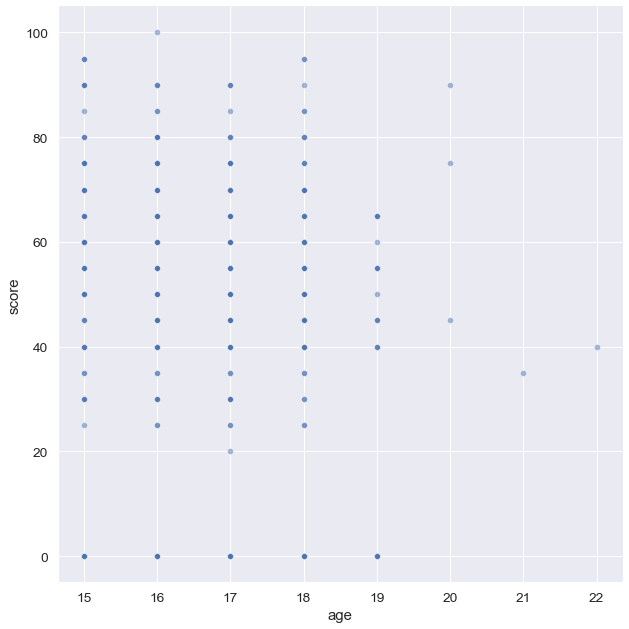

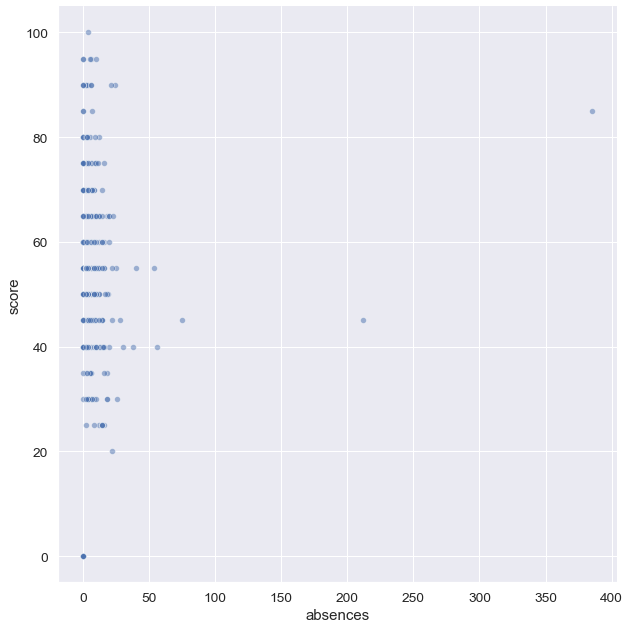

In [18]:
for item in features_numerical:
#     size_count = stud_math_present.groupby([item, target_name])[target_name].count()
    sns.relplot(x=item, y=target_name, data=data, #size=size_count,
                alpha=.5, height=9, aspect=1, palette="muted")

## 3.0 Target features ('score')

==== score ====
       count       mean        std  min   25%   50%   75%    max
score  389.0  52.262211  22.919022  0.0  40.0  55.0  70.0  100.0 

There are 0 missing values in 'score'. 




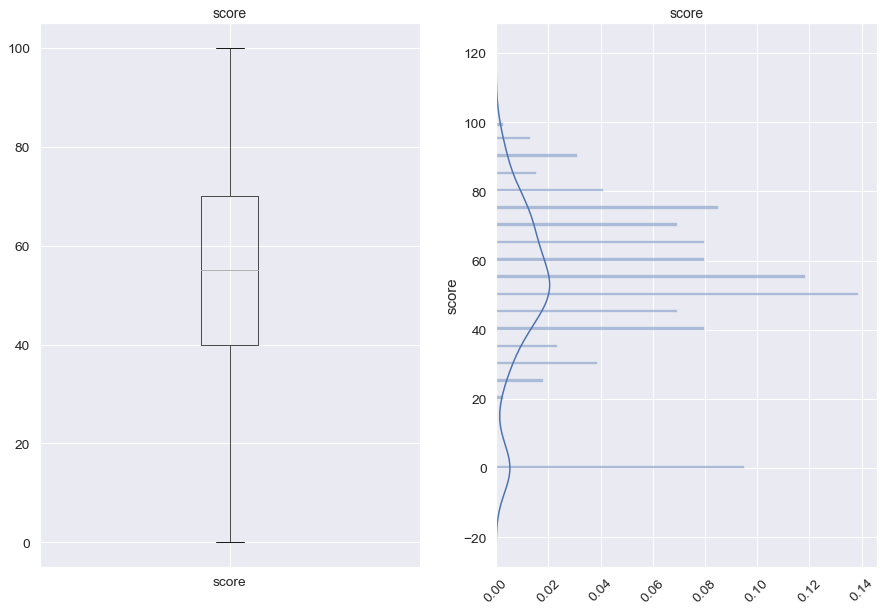

In [19]:
target_name = 'score'
num_variable_analysis(data, target_name, target_name)

The values of target feature are quantized with the step of `5`. Let us check this.

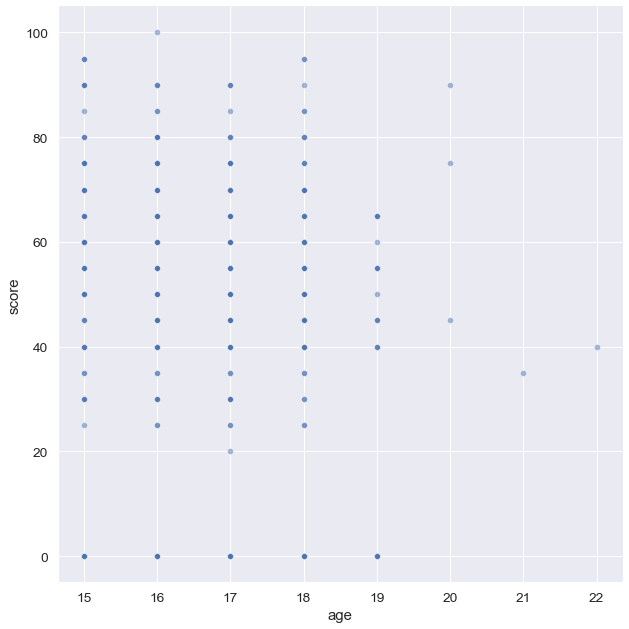

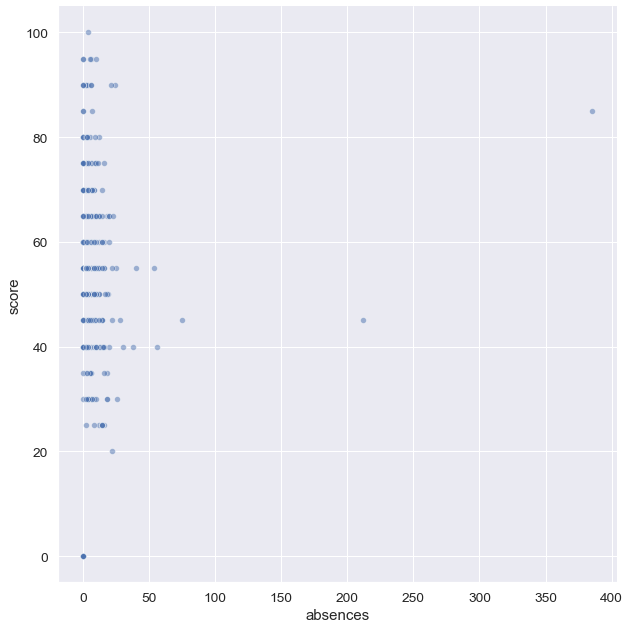

In [20]:
for item in features_numerical:
#     size_count = data_present.groupby([item, target_name])[target_name].count()
    sns.relplot(x=item, y=target_name, data=data, #size=size_count,
                alpha=.5, height=9, aspect=1, palette="muted")

There is an outlier with value of `0`. Other values belong to the range [20, 100] with the step of 5.

Apparently the score `0` corresponds to the fact that student misses the exam or fails it. Since we need to predict the score of the students who pass the exam, we drop entities with the score `0`. 

And there will be 352 entities for us.

**Note:** The prediction "does student pass the exam or not" is a classification problem but not the regression one. It takes another approach and other models.

**It is important!** We must take into account the quantization of score on the stage of prediction and validation.

In [21]:
data_present = data[ data[target_name] != 0 ]#.reset_index()
data_absent = data[ data[target_name] == 0 ]#.reset_index()

print('data_present:', data_present.shape)
print('data_absent:', data_absent.shape)

data_present: (352, 30)
data_absent: (37, 30)


==== score ====
       count       mean        std   min   25%   50%   75%    max
score  352.0  57.755682  16.200928  20.0  45.0  55.0  70.0  100.0 

There are 0 missing values in 'score'. 




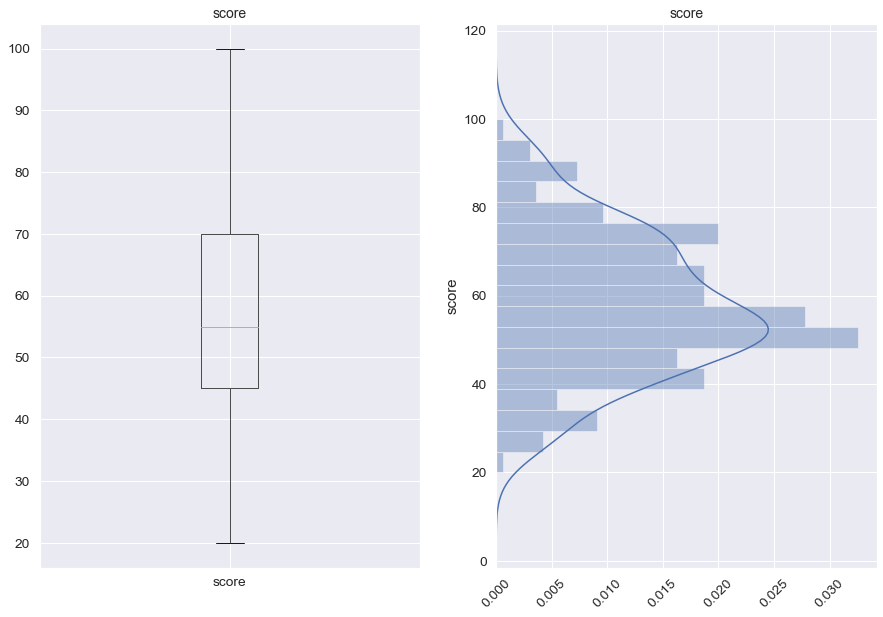

In [22]:
num_variable_analysis(data_present, target_name, target_name, n_bins=17)

## 3.1 Numerical features

==== age ====
     count       mean       std   min   25%   50%   75%   max
age  352.0  16.633523  1.256011  15.0  16.0  17.0  18.0  22.0 

Pearson correlation coefficient between 'age' and 'score' is -0.1315. 

There are 0 missing values in 'age'. 


==== absences ====
          count      mean      std  min  25%  50%  75%    max
absences  342.0  8.090643  24.7046  0.0  2.0  4.0  8.0  385.0 

Pearson correlation coefficient between 'absences' and 'score' is -0.0140. 

There are 10 missing values in 'absences'. 




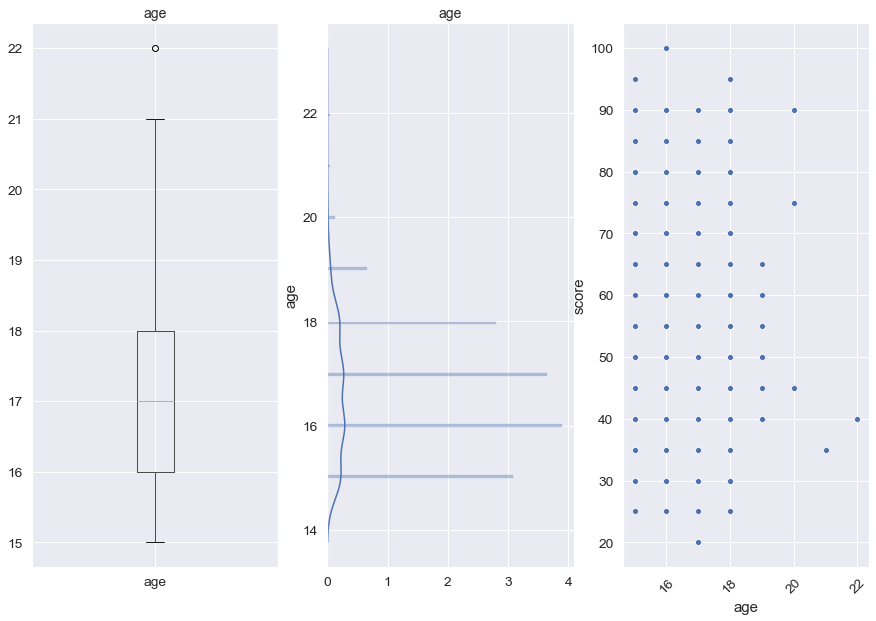

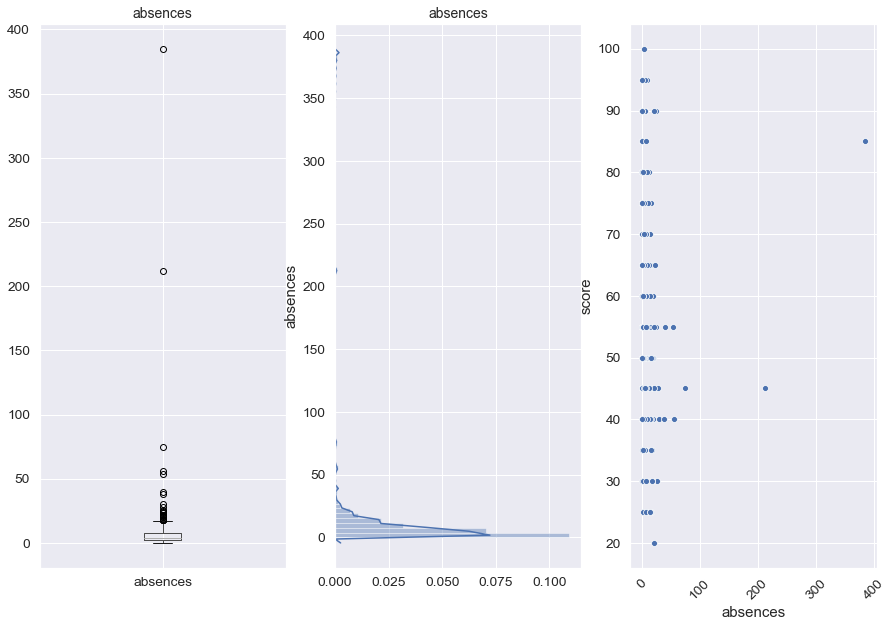

In [23]:
for item in features_numerical:
    num_variable_analysis(data_present, item, target_name)

The feature 'age' has not anomalies. Pearson correlation coefficient is quite small, negative and is equal to -0.13. This fact, apparently, describes the situation of "when you get older it is harder to pass an exam". But though this effect exists, it is not strictly determined, and that is a reason for a small absolute value of the correlation coefficient.

This feature describes the real effect and is reliable to the model.

In [24]:
data_present.loc[ data_present[ data_present['absences'] > 100 ]['absences'].index ]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,...,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


As it clear from *boxplot* and *scatterplot* the features 'absences' (number of missed classes) contains 2 anomalies (with values of 212 and 385).

These anomalies correspond to:
- a girl of 16 with a huge number of missed classes (385), who nevertheless is very smart (or successfully cheated) and got the high score - 85;
- a guy of 20 from single-parent family, who has a lot of freetime, girlfriend but at the same time he managed to pass the math exam with score of 45.

The correlation coefficient between the feature with these 2 anomalies and the target feature is very close to zero (-0.01). Let us investigate the situation without these 2 anomalies.

==== absences ====
          count      mean       std  min  25%  50%  75%   max
absences  340.0  6.382353  8.323527  0.0  2.0  4.0  8.0  75.0 

Pearson correlation coefficient between 'absences' and 'score' is -0.2149. 

There are 0 missing values in 'absences'. 




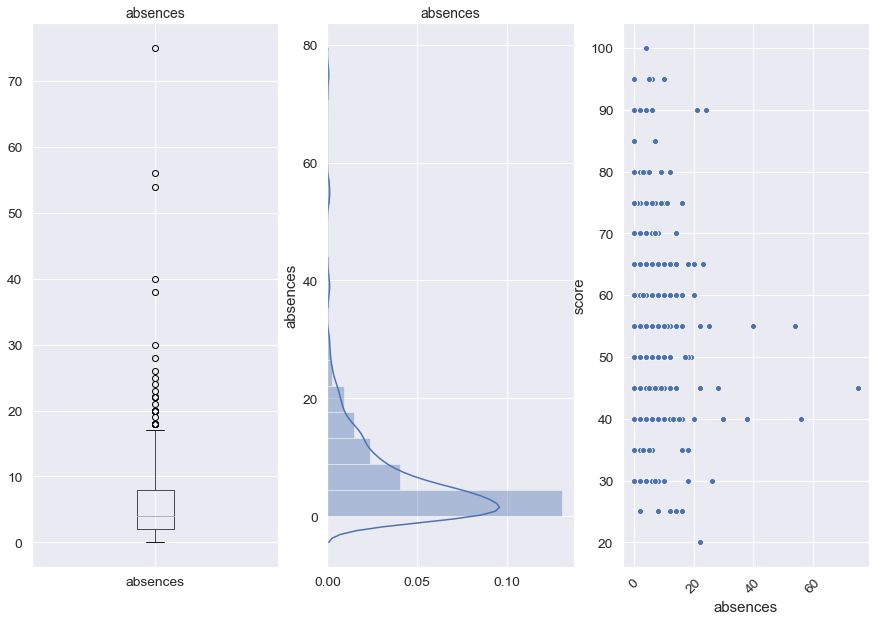

In [25]:
num_variable_analysis(data_present[ data_present['absences'] <= 100 ], 'absences', target_name, n_bins=17)

When we dropped these 2 anomalies we have an adequate distribution and correlation coefficient of -0.21, describing the effect of "absences up - score down". 

We drop these 2 abnormal entities.

In [26]:
# Since the feature 'absences' has 10 missing values
# do not drop anomalies like this:
# 
# data_present = data_present[ data_present['absences'] <= 100 ]
#
# because you will also drop missing values.


indices_to_drop = data_present[ data_present['absences'] > 100 ]['absences'].index
data_present = data_present.drop(index=indices_to_drop)#.reset_index()

print("There are {} entities in dataset now.".format( len(data_present) ))
# data_present

There are 350 entities in dataset now.


## 3.2 Categorical features

Let us calculate the number of unique values in categorical features.

In [27]:
categorical_unique_dict = dict()
for item in features_categorical:
    categorical_unique_dict[item] = data_present[item].nunique()

categorical_unique = pd.Series(categorical_unique_dict, index=categorical_unique_dict.keys()).sort_values(ascending=False)
categorical_unique

Fedu                   6
famrel                 6
Fjob                   5
Mjob                   5
goout                  5
health                 5
Medu                   5
freetime               5
failures               4
studytime              4
traveltime             4
reason                 4
studytime, granular    4
guardian               3
romantic               2
famsize                2
schoolsup              2
famsup                 2
paid                   2
address                2
internet               2
nursery                2
sex                    2
Pstatus                2
higher                 2
activities             2
school                 2
dtype: int64

In [28]:
print("We have {} binary variables.".format(categorical_unique[ categorical_unique == 2 ].count()))
print("There are {} variables: {}, which have maximal number ({}) of unique values."
      .format(categorical_unique[ categorical_unique == categorical_unique.max() ].count(), 
              list(categorical_unique[ categorical_unique == categorical_unique.max() ].index),
              categorical_unique.max()))

We have 13 binary variables.
There are 2 variables: ['Fedu', 'famrel'], which have maximal number (6) of unique values.


### 3.2.1 Ordinal features

#### 3.2.1.0 Function for analysis of ordinal variables

It is convenient to create a function for analysis of ordinal data, which
- plot `sns.barplot()` - which is distribution in fact - to detect class imbalance
- plot `sns.boxplot()` for each class - to detect anomalies/outliers inside the class
- plot distribution with `sns.kdeplot()` for each class - to compare classes (`sns.distplot()` appears to be uninformative due to overlapping)
- calculate Pearson coefficient of linear correlation for `feature`/`target` pair
- calculate the counts of target feature (which is proportional to the frequency) for each class to detect anomalies 
- calculate the number of missing values.

In [29]:
def ordinal_variable_analysis(df, item, target_name):
    fig, axes = plt.subplots(1, 3, figsize=(15, 10))
    
    # ==== FIG 1 (barplot)
    bar_data = df.groupby(item)[item].count()
    br_plot = sns.barplot(x=bar_data.index, y=bar_data, ax = axes[0], palette="Blues_d")
    br_plot.set_xticklabels(bar_data.index, rotation=45)
    axes[0].set_title(item, fontsize=FONT_SIZE)
    
    
    # ==== FIG 2 (boxplots for classes)
    bx_plot = sns.boxplot(x=item, y=target_name, data=df, ax=axes[1])    
    bx_plot.set_xticklabels(bar_data.index, rotation=45)
    plt.xticks(rotation=45)
    axes[1].set_title(item, fontsize=FONT_SIZE)

        
    # ==== FIG 3 (kdeplots for classes)
    values = df[item].value_counts()
    
    for value in values.index:
        sns.kdeplot(df[ df[item] == value ][target_name], vertical=True, ax=axes[2], label=value)    
    axes[2].set_title(item, fontsize=FONT_SIZE)
    axes[2].legend(fontsize=FONT_SIZE)
    
    
    # === Descriptive statistics
    
    print("==== {} ====\n".format(item))
    if item != target_name:
        print("Pearson correlation coefficient between '{}' and '{}' is {:.4f}."
              .format( item, 
                      target_name, 
                      np.array(df[[item, target_name]].corr())[0, 1] ), "\n")
    
    print(bar_data, "\n")
    
    print("There are {} missing values in '{}'.".format( df[item].isna().sum(), item ), '\n'*2)

==== Medu ====

Pearson correlation coefficient between 'Medu' and 'score' is 0.1896. 

Medu
0.0      3
1.0     47
2.0     86
3.0     87
4.0    125
Name: Medu, dtype: int64 

There are 2 missing values in 'Medu'. 




C:\Users\DNS\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


==== Fedu ====

Pearson correlation coefficient between 'Fedu' and 'score' is 0.0688. 

Fedu
0.0      2
1.0     65
2.0     93
3.0     88
4.0     80
40.0     1
Name: Fedu, dtype: int64 

There are 21 missing values in 'Fedu'. 


==== traveltime ====

Pearson correlation coefficient between 'traveltime' and 'score' is -0.0743. 

traveltime
1.0    217
2.0     86
3.0     17
4.0      7
Name: traveltime, dtype: int64 

There are 23 missing values in 'traveltime'. 


==== studytime ====

Pearson correlation coefficient between 'studytime' and 'score' is 0.1429. 

studytime
1.0     90
2.0    171
3.0     58
4.0     24
Name: studytime, dtype: int64 

There are 7 missing values in 'studytime'. 


==== studytime, granular ====

Pearson correlation coefficient between 'studytime, granular' and 'score' is -0.1429. 

studytime, granular
-12.0     24
-9.0      58
-6.0     171
-3.0      90
Name: studytime, granular, dtype: int64 

There are 7 missing values in 'studytime, granular'. 




C:\Users\DNS\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


==== famrel ====

Pearson correlation coefficient between 'famrel' and 'score' is 0.0612. 

famrel
-1.0      1
 1.0      6
 2.0     13
 3.0     56
 4.0    163
 5.0     87
Name: famrel, dtype: int64 

There are 24 missing values in 'famrel'. 


==== freetime ====

Pearson correlation coefficient between 'freetime' and 'score' is -0.0074. 

freetime
1.0     16
2.0     59
3.0    131
4.0    102
5.0     34
Name: freetime, dtype: int64 

There are 8 missing values in 'freetime'. 


==== goout ====

Pearson correlation coefficient between 'goout' and 'score' is -0.1730. 

goout
1.0     18
2.0     92
3.0    118
4.0     73
5.0     43
Name: goout, dtype: int64 

There are 6 missing values in 'goout'. 


==== health ====

Pearson correlation coefficient between 'health' and 'score' is -0.0731. 

health
1.0     45
2.0     36
3.0     80
4.0     52
5.0    124
Name: health, dtype: int64 

There are 13 missing values in 'health'. 




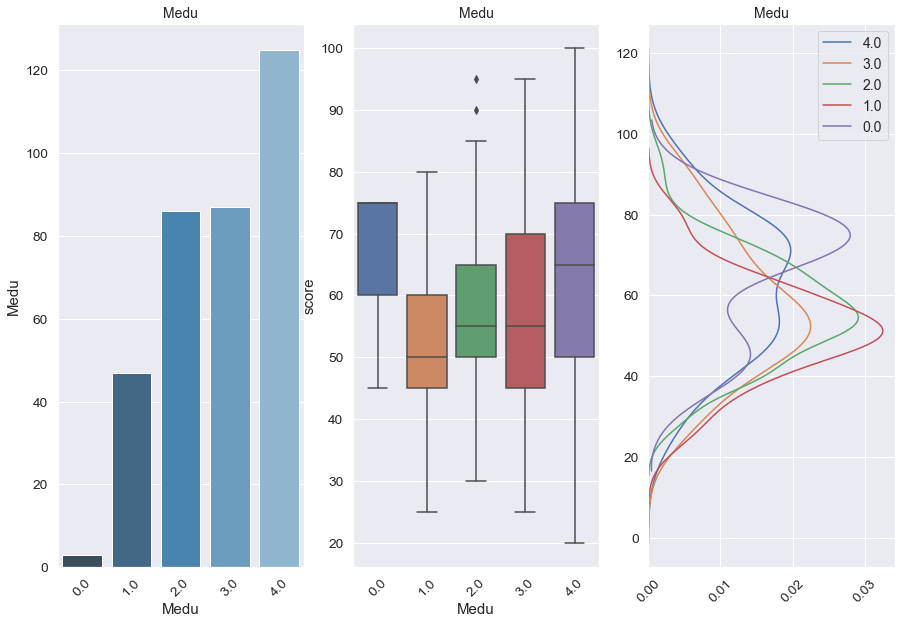

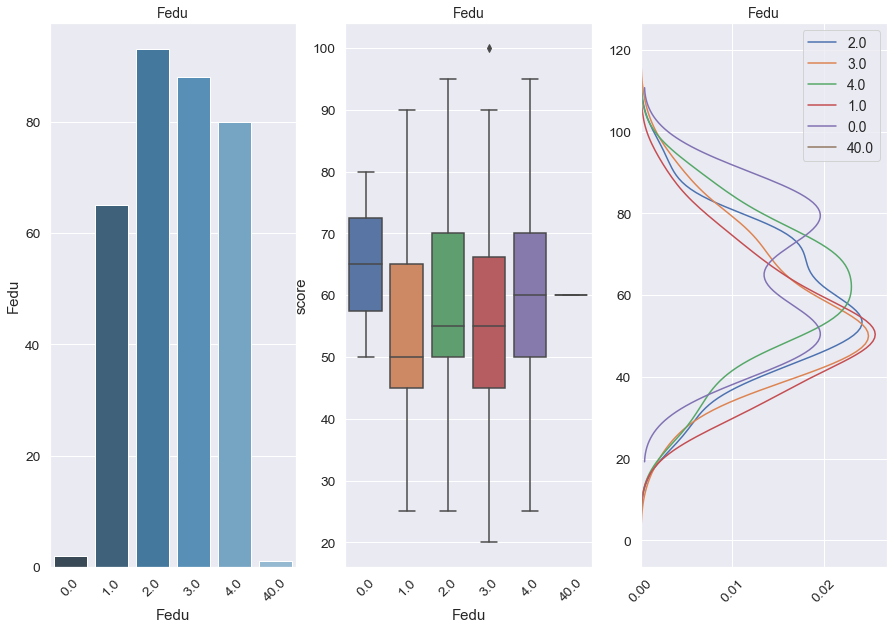

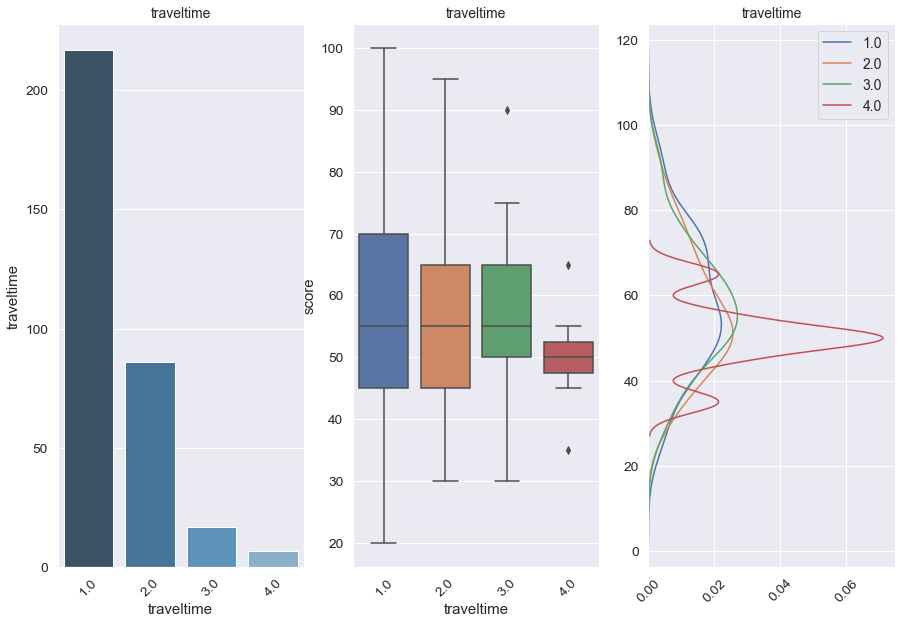

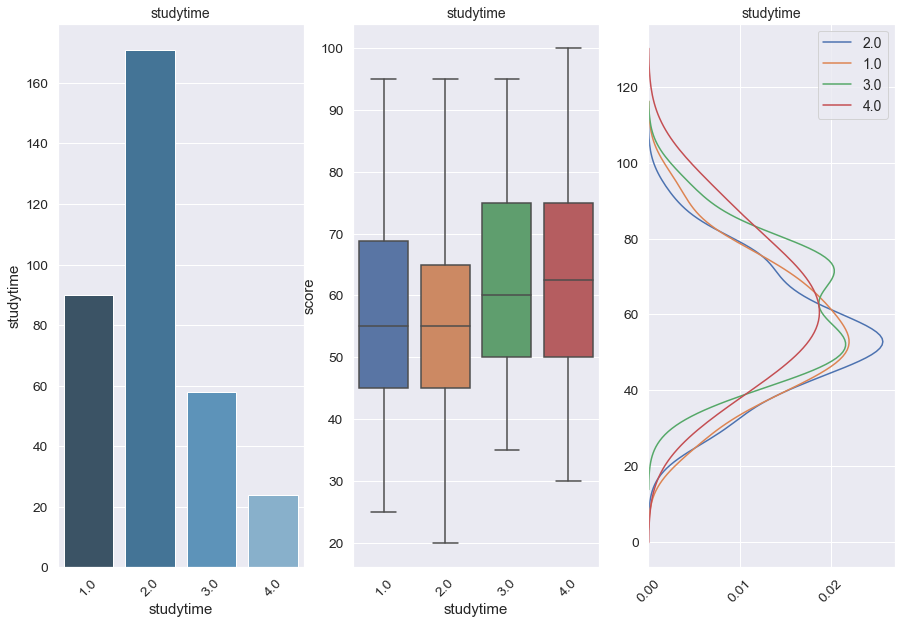

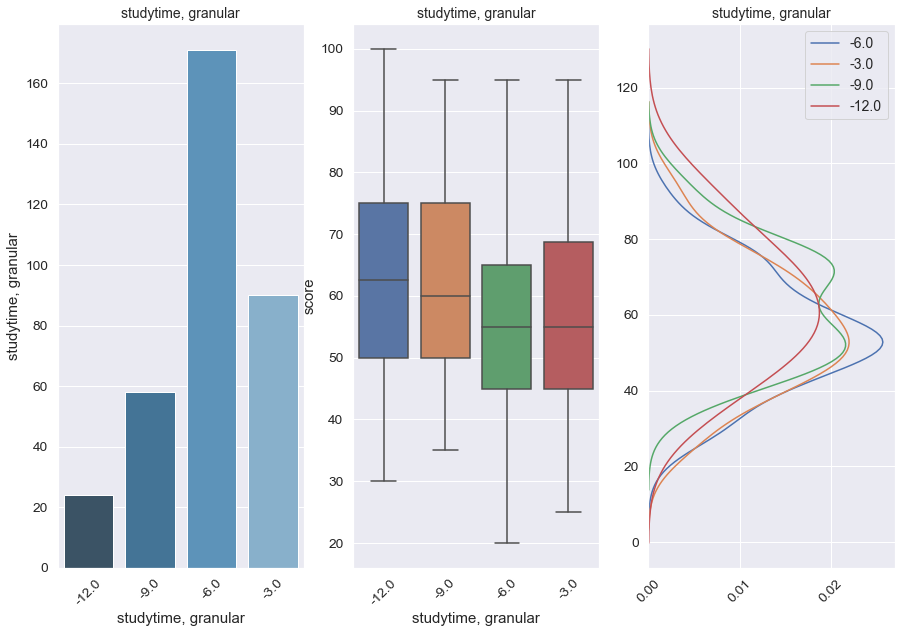

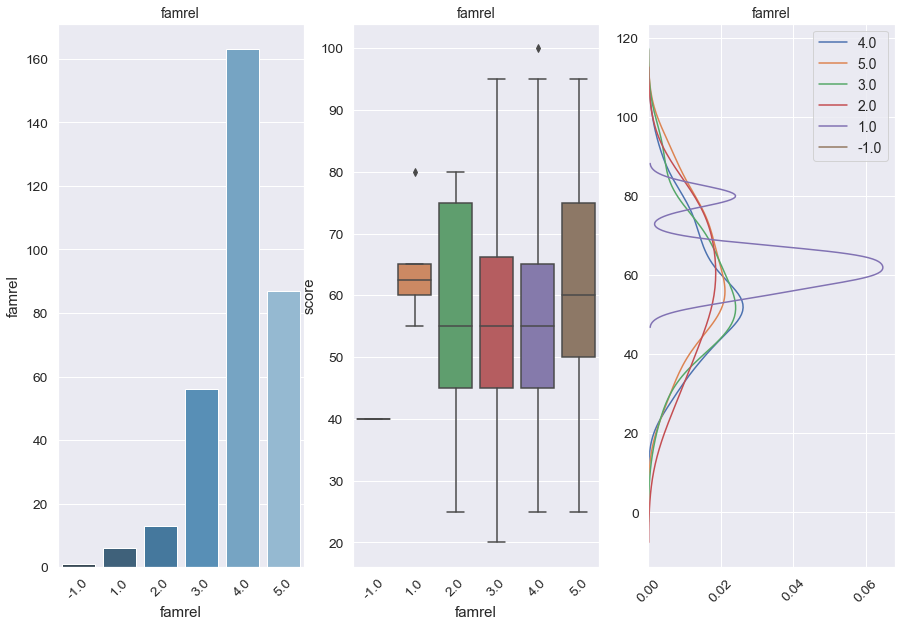

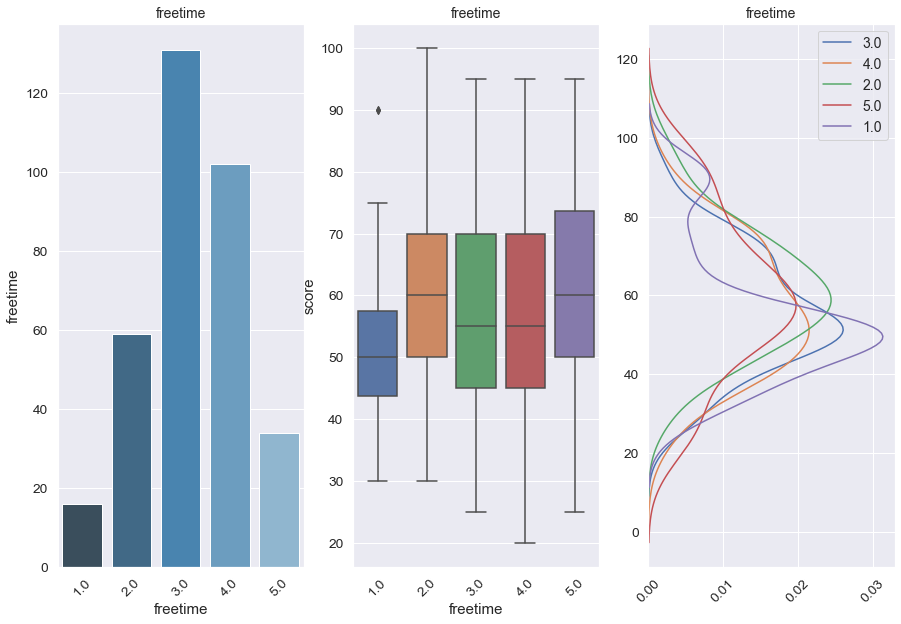

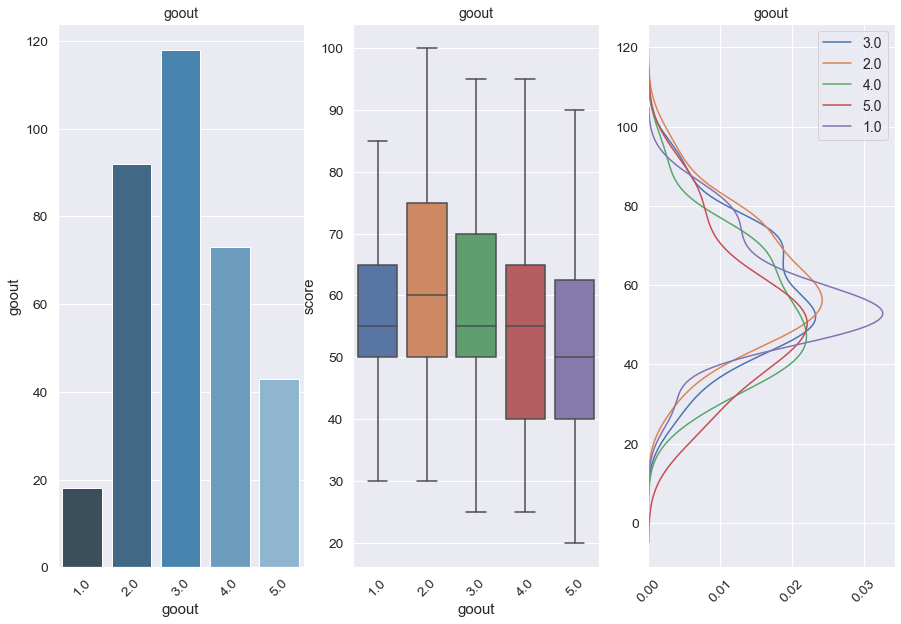

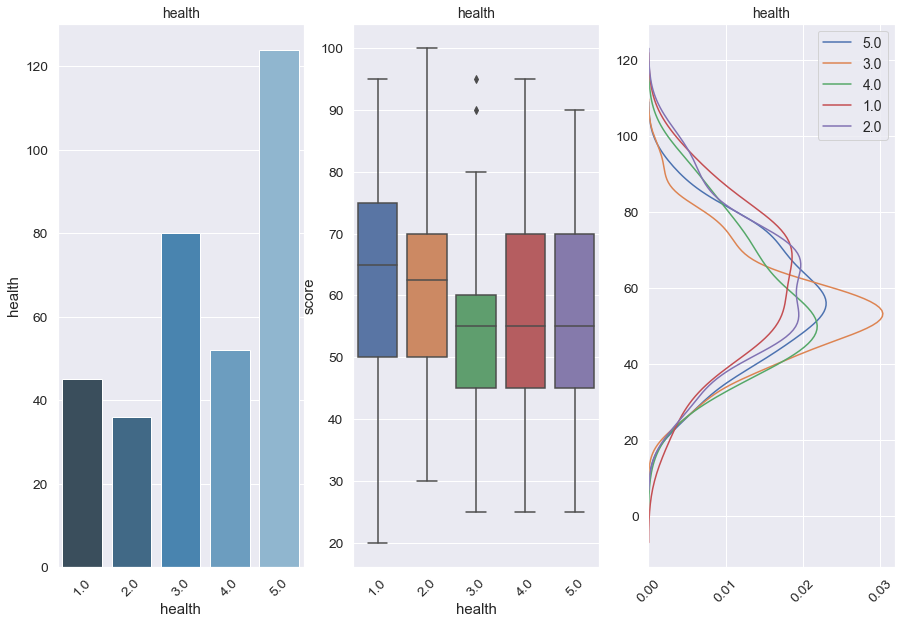

In [30]:
for item in features_ordinal:
    ordinal_variable_analysis(data_present, item, target_name)

**Detected anomalies:**


1. `Fedu` - education of father (0 - no, 1 - 4 years, 2 - 5-9 years, 3 - 11 years or college, 4 - univercity). 
There is the outlier with absurd value of `40`. Appearantly it is a misprint. Will be substituted with `4`.

2. `famrel` - family relationship (from 1 - very bad to 5 - very good). There is the outlier with absurd value of `-1`.
Appearantly it is a misprint. Will be substituted with `1`.

In [31]:
index_subst = data_present[ data_present['Fedu'] == 40 ].index
data_present.loc[index_subst, 'Fedu'] = 4

==== Fedu ====

Pearson correlation coefficient between 'Fedu' and 'score' is 0.1327. 

Fedu
0.0     2
1.0    65
2.0    93
3.0    88
4.0    81
Name: Fedu, dtype: int64 

There are 21 missing values in 'Fedu'. 




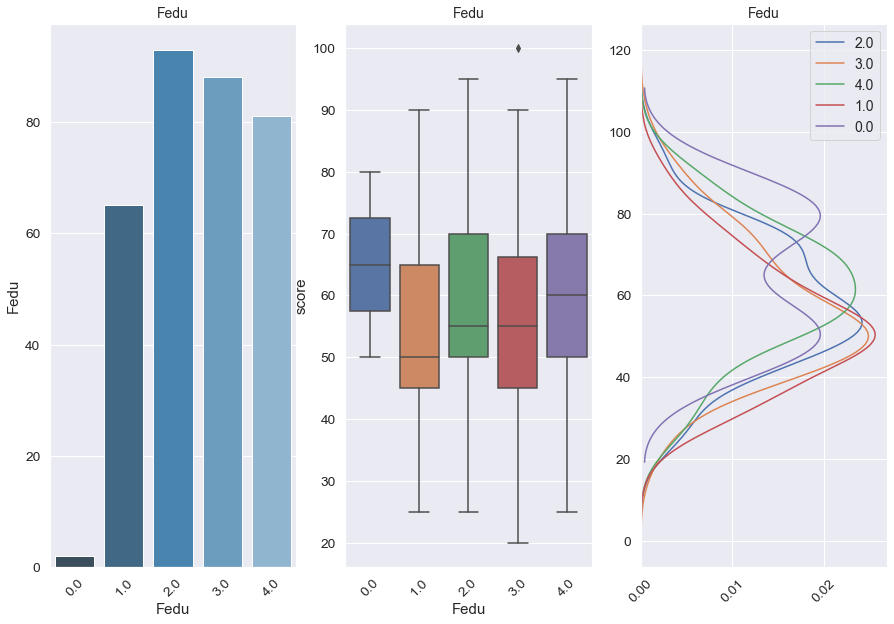

In [32]:
ordinal_variable_analysis(data_present, 'Fedu', target_name)

In [33]:
index_subst = data_present[ data_present['famrel'] == -1 ].index
data_present.loc[index_subst, 'famrel'] = 1

==== famrel ====

Pearson correlation coefficient between 'famrel' and 'score' is 0.0555. 

famrel
1.0      7
2.0     13
3.0     56
4.0    163
5.0     87
Name: famrel, dtype: int64 

There are 24 missing values in 'famrel'. 




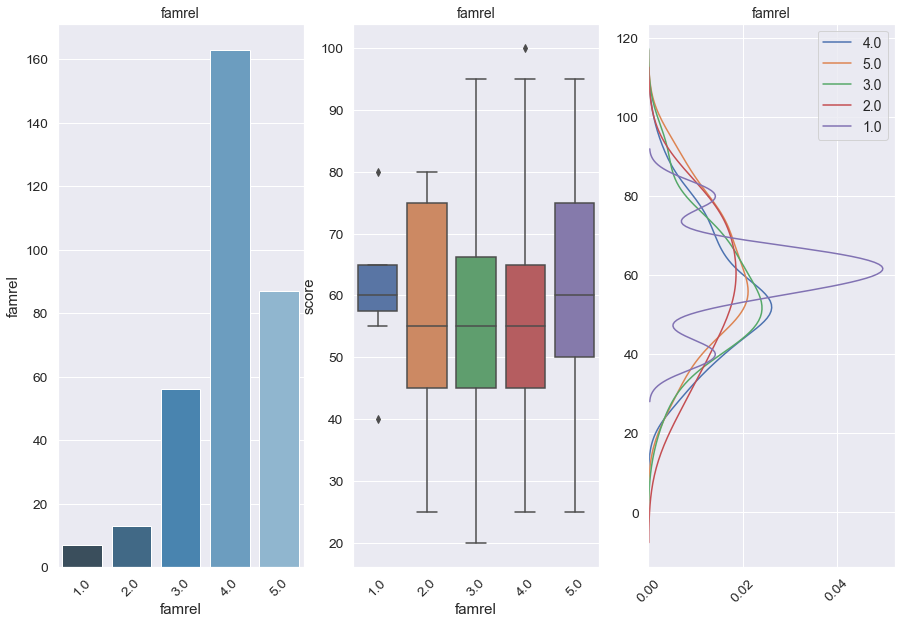

In [34]:
ordinal_variable_analysis(data_present, 'famrel', target_name)

| Feature | Feature description | Anomalies | Missing values | Correlation coefficient (with target) | Correlation description | Action | 
| :-- | :-- | :-- | --: | --: | :-- | -:- | 
| **Medu** | education of mother (0 - no, 1 - 4 years, 2 - 5-9 years, 3 - 11 years or college, 4 - university) | no | 2 | 0.19 | Education of mother up, the exam score up too | Accepted | 
| **Fedu** | education of father (0 - no, 1 - 4 years, 2 - 5-9 years, 3 - 11 years or college, 4 - university) | Anomaly with absurd value of `40`. Substituted with `4`. | 21 | 0.13 | Education of father up, the exam score up too | Accepted |
| **traveltime** | travel time to school (1 - <15 min, 2 - 15-30 min, 3 - 30-60 min, 4 - >60 min) | no | 23 | -0.07 | Get to school longer, pass exam worse | **Check multicollinearity** (e.g., with `address`) |
| **studytime** | study time beyond school per week (1 - <2 hours, 2 - 2-5 hours, 3 - 5-10 hours, 4 - >10 hours) | no | 7 | 0.14 | More efforts, better result <br> *That's what she said* | Accepted |
| **Studytime, granular** | without description. Nobody knows what is it. | no | 7 | -0.14 | With the increase of *emmm,... the stuff* the score decreased | **Check collinearity** with `studytime` (the same absolute value of correlation coefficient) |
| **famrel** | family relationship (from 1 - very bad to 5 - very good) | An anomaly with absurd value of `-1`. Substituted with `1` | 24 | 0.055 | Good family relations lead to good grades | Accepted |
| **freetime** | free time after school (from 1 - very little to 5 - very much) | no | 8 | 0.007 | Maybe do not affect on the exam score, but the distributions of `score` for different classes seem to differ | Accepted |
| **goout** | spending time with friends (from 1 - very little to 5 - very much) | no | 6 | -0.17 | Hanging out with friends, forget about high exam score | Accepted |
| **health** | current health state (from 1 - very bad to 5 - very good) | no | 13 | -0.07 | Feel yourself good, pass exam bad | **Check multicollinearity** |

In [35]:
# data_present.drop(['freetime'], axis=1, inplace=True)
# features_ordinal_set = features_ordinal_set - set(['freetime'])
# features_ordinal = list(features_ordinal_set)
# data_present.shape

### 3.2.2 One-Hot features

The problem of how to study the collinearity of binary feature with the target feature is not so easy and evident. The Pearson coefficient of linear collinearity is not applicable.

Let us formulate the question as follows:
- Do we have statistical difference between distributions of two values of binary variable.

Here we can use
- statistic tests to compare mean values, standard deviations etc.
- or simplest comparison of these distributions (basic statistic indicators) with the threshold. 

We start with the latter option, since it is easier. The correct statistical tests take a lot of time for careful coding of different situations (see below). That's why let us obtain simplest results and maybe we will do better if we have time.

**The simplest comparison of distributions:**
Two distributions are equal if:
- mean values differ in more than a half of `score` 'quantum' (i.e., 2.5) and
- standard deviations differ in more than one `score` 'quantum' (i.e., 5).

**It is important to check the class imbalance**

Two classes are in imbalance
- when we sorted classes by frequency,
- and obtained the frequency ratio more than the threshold (here we choose `3`).

The number `3`is 'magic' due to following statements:
- For exponentional physical proccesses (e.g., damping) the typical characteristic (decay rate) is defined as the value when the function changes in $e\simeq 2.72$ times;
- The change in a half of a decimal order is a change in $10^{0.5}\simeq 3.16$ times, and it is a threshold of rounding "in order of magnitude"
- $\pi\simeq 3.14$ - is also beautiful and important number
- ...

So, let us calculate arithmetic, geometric or/and harmonic mean  (3.01 / 3.00 / 2.99 ), and round it as `3` (*moment for humour*).

In [36]:
x = np.array([np.exp(1), 10**0.5, np.pi])
print(x)
print( "Arithmetic mean = {:.2f}".format( x.mean() ))
print( "Geometric mean = {:.2f}".format( x.prod()**(1/len(x)) ))
print( "Harmonic mean  = {:.2f}".format( 1/((1/x).mean()) ))

[2.71828183 3.16227766 3.14159265]
Arithmetic mean = 3.01
Geometric mean = 3.00
Harmonic mean  = 2.99


#### 3.2.2.0 Function for analysis of One-Hot variables

The analysis of *One-Hot* variables is much like the analysis of *Ordinal* variables. The differences are only in:

- it is more appropriate to plot `sns.distplot ()` instead of `sns.kdeplot ()` for each class  
- The Pearson coefficient of linear correlation is not calculated for the pair of `feature` /` target`
- To compare class distributions the basic statistical indicators `.describe ()` (*mean*, *std*, *min* and *max* values, *quartiles*) for each class are calculated, as well as mean and standard deviation (by classes) from these values
- The class imbalance is calculated: the classes are ranked by frequency and the ratio of the class frequency to the frequency of the previous one is calculated; if the maximal ratio exceeds the threshold, a warning about a possible imbalance of classes appears.


As a whole list:

- plot `sns.barplot()` - which is distribution in fact - to detect class imbalance
- plot `sns.boxplot()` for each class - detect anomalies inside each class
- plot distributions with `sns.distplot()` for each class to compare classes
- calculate the counts of target feature (which is proportional to the frequency) for each class to detect anomalies 
- calculate the basic statistical indicators `.describe ()` (*mean*, *std*, *min* and *max* values, *quartiles*) for each class, as well as mean and standard deviation (by classes) from these values to compare class distributions
- calculate the class imbalance: the classes are ranked by frequency and the ratio of the class frequency to the frequency of the previous one is calculated; if the maximal ratio$^1$ exceeds the threshold, a notification about a possible imbalance of classes appears.
- calculate the number of missing values.

Returns: the maximal value$^1$ of class imbalance.



$^1$ *The list of categorical variables suspected in class imbalance is formed along with this value.*

In [37]:
def rounder(x, m=2):
    return round(x, m)

def one_hot_variable_analysis(df, item, target_name, n_bins=100, class_balance_threshold=3):
    if item != target_name:
        fig, axes = plt.subplots(1, 3, figsize=(15, 10))
    else:
        fig, axes = plt.subplots(1, 2, figsize=(15, 10))
    
    
    # ==== FIG 1 (barplot)
    bar_data = df.groupby(item)[item].count().sort_values(ascending=False)
    br_plot = sns.barplot(x=bar_data.index, y=bar_data, ax = axes[0], palette="Blues_d")
    br_plot.set_xticklabels(bar_data.index, rotation=45)
    axes[0].set_title(item, fontsize=FONT_SIZE)
    
    # ==== FIG 2 (boxplot)
    bx_plot = sns.boxplot(x=item, y=target_name, data=df, ax=axes[1])
    bx_plot.set_xticklabels(bar_data.index, rotation=45)
    axes[1].set_title(item, fontsize=FONT_SIZE)

    
    # ==== FIG 3 (distplot)
    values = df[item].value_counts()
    
    for value in values.index:
        sns.distplot(df[ df[item] == value ][target_name], bins=n_bins, kde=True, norm_hist=True, 
                     vertical=True, ax=axes[2], label=value)
    
    axes[2].set_title(item, fontsize=FONT_SIZE)
    axes[2].legend(fontsize=FONT_SIZE)
    
    
    # === Descriptive statistics    
    
    print("==== {} ====\n".format(item))
    
    
    print(bar_data, "\n")
    
    
    values = df[item].value_counts()
    k = 0
    for value in values.index:
        describer_value = pd.DataFrame(df[ df[item] == value ][target_name].describe())
#         ! print("!!!\n", values, "\n")
        if k == 0:
            describer = describer_value.copy()
        else:
            describer = pd.concat([describer, describer_value], axis=1)
        k += 1    
    describer.columns = values.index
    describer = describer.T
    describer_moments = pd.DataFrame([describer.mean(), describer.std()], index=['MEAN', 'STD'])
    describer = pd.concat([describer, describer_moments], axis=0)
    describer = describer.apply(rounder)
    print(describer, "\n")       
    
    
    print("Class balance ratio (to previous):")
    bar_data_sorted = bar_data.sort_values()
    class_balance_ratio = round(np.exp(np.log(bar_data_sorted).diff()), 2)
    print(class_balance_ratio, "\n")    
    if class_balance_ratio.max() > class_balance_threshold:
        print("It seems to be a severe CLASS IMBALANCE: Maximal Class balance ratio (to previous) is", 
              class_balance_ratio.max(), "\n")
    else:
        print("Maximal Class balance ratio (to previous) is ", class_balance_ratio.max(), "\n")
    
    print("There are {} missing values in '{}'.".format( df[item].isna().sum(), item ), '\n'*2)
    
    return class_balance_ratio.max()

==== higher ====

higher
yes    318
no      13
Name: higher, dtype: int64 

       count   mean    std    min    25%    50%    75%     max
yes   318.00  58.03  16.48  20.00  46.25  55.00  70.00  100.00
no     13.00  49.23   9.54  35.00  40.00  50.00  60.00   65.00
MEAN  165.50  53.63  13.01  27.50  43.12  52.50  65.00   82.50
STD   215.67   6.23   4.90  10.61   4.42   3.54   7.07   24.75 

Class balance ratio (to previous):
higher
no       NaN
yes    24.46
Name: higher, dtype: float64 

It seems to be a severe CLASS IMBALANCE: Maximal Class balance ratio (to previous) is 24.46 

There are 19 missing values in 'higher'. 


==== activities ====

activities
yes    172
no     166
Name: activities, dtype: int64 

       count   mean    std    min    25%   50%    75%     max
yes   172.00  58.81  16.06  25.00  50.00  55.0  70.00  100.00
no    166.00  56.75  16.61  20.00  45.00  55.0  68.75   95.00
MEAN  169.00  57.78  16.34  22.50  47.50  55.0  69.38   97.50
STD     4.24   1.46   0.39   3.54 

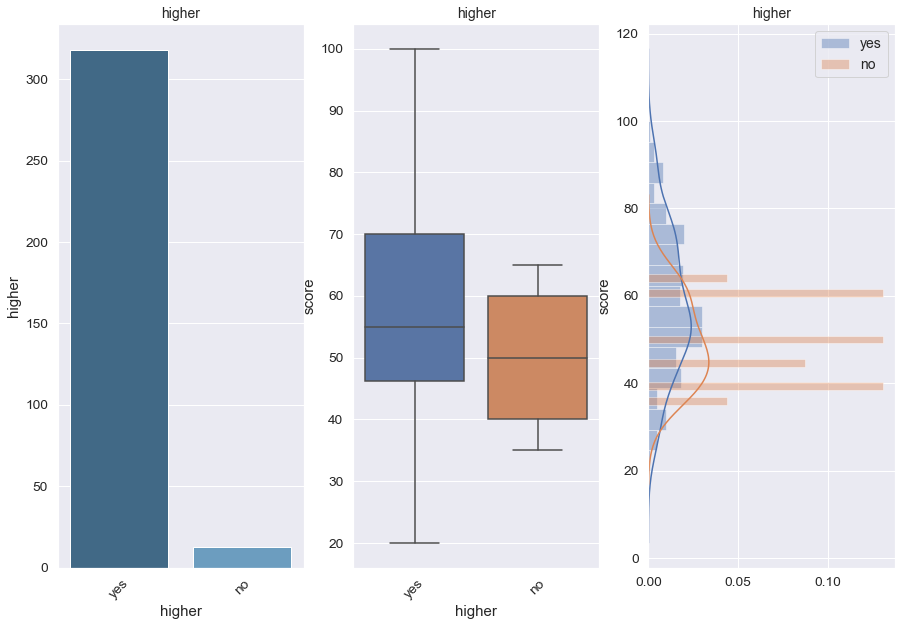

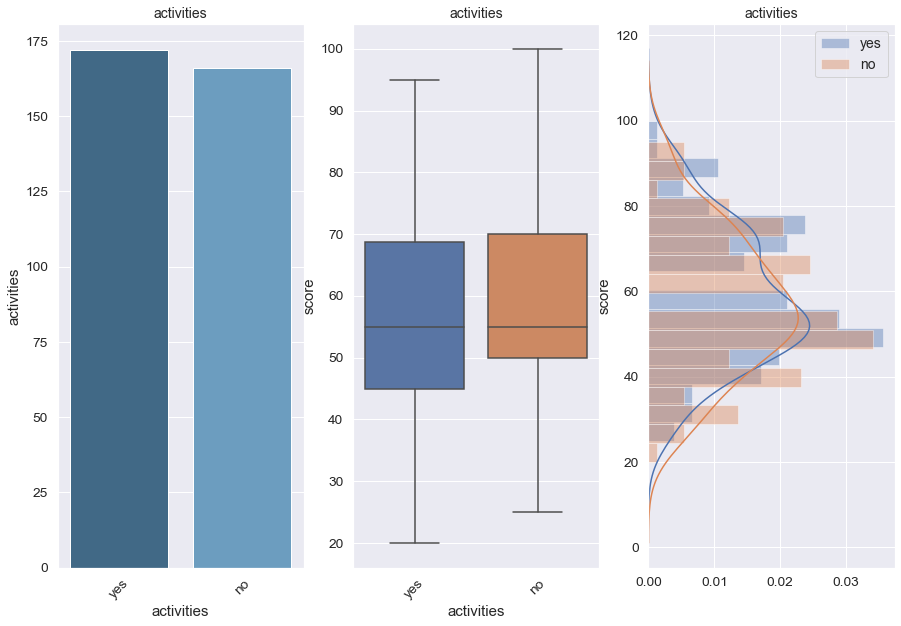

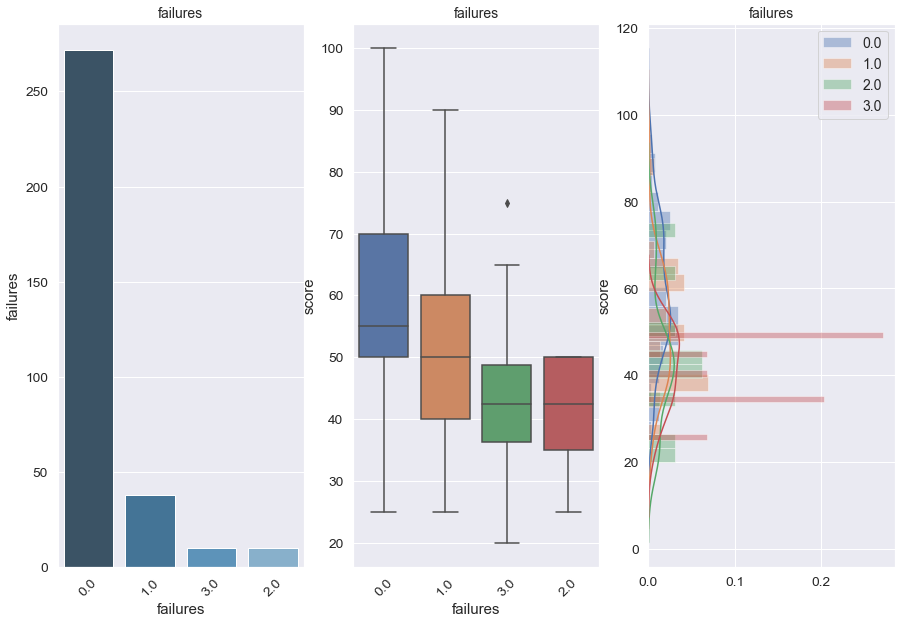

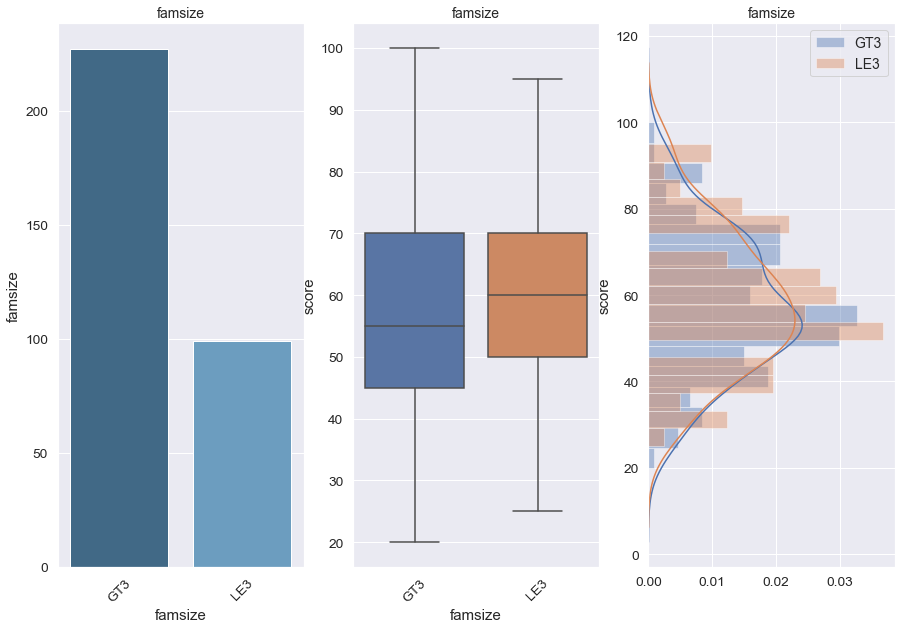

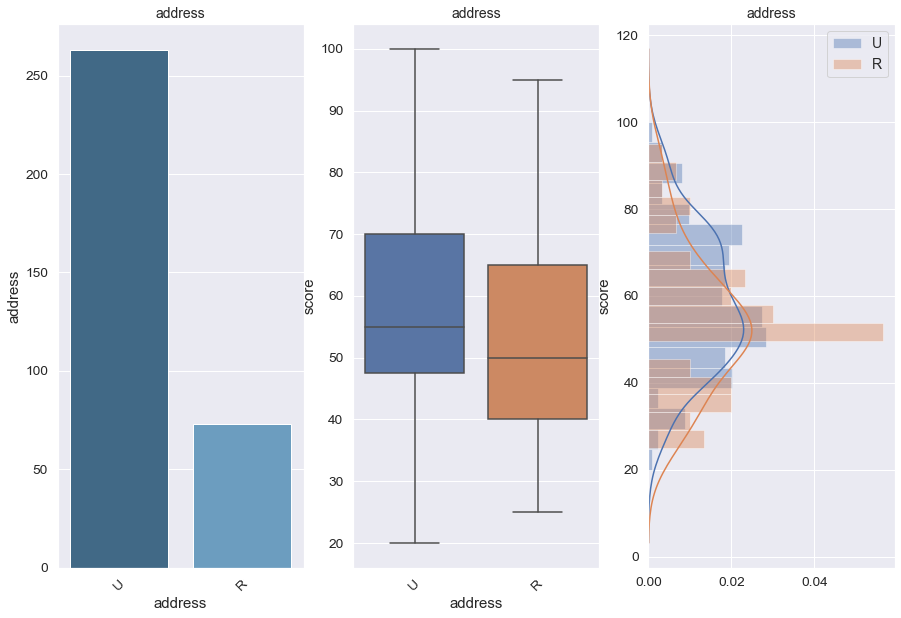

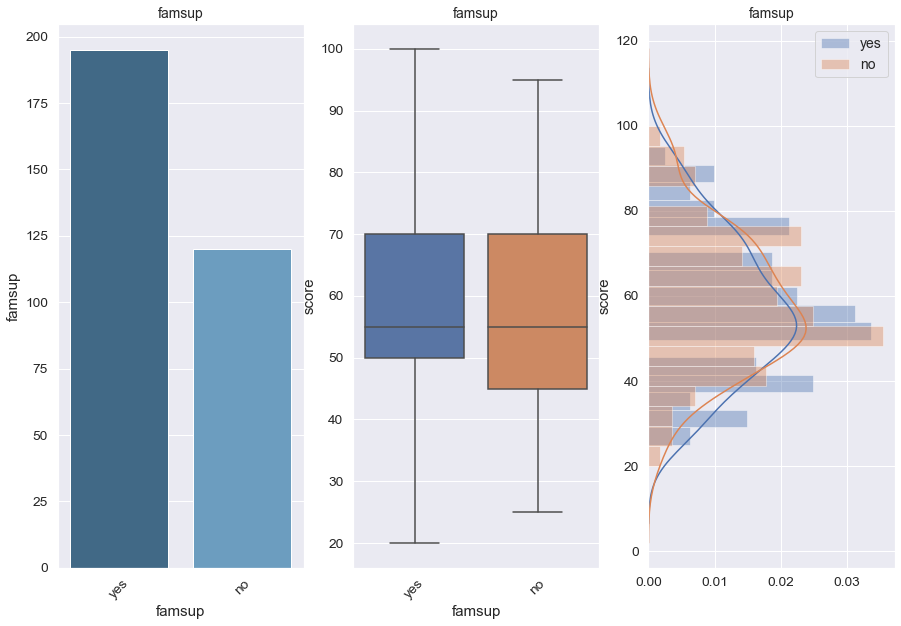

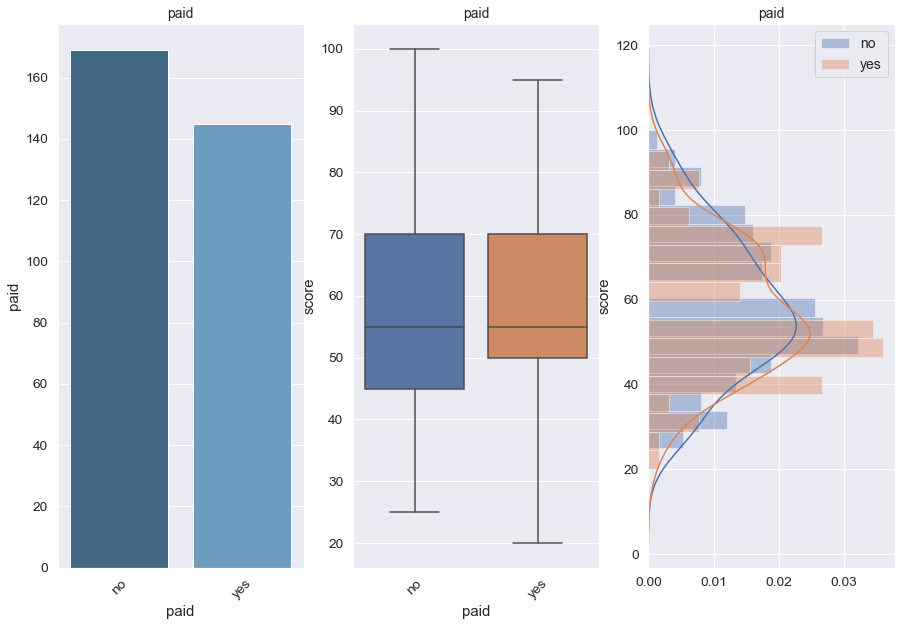

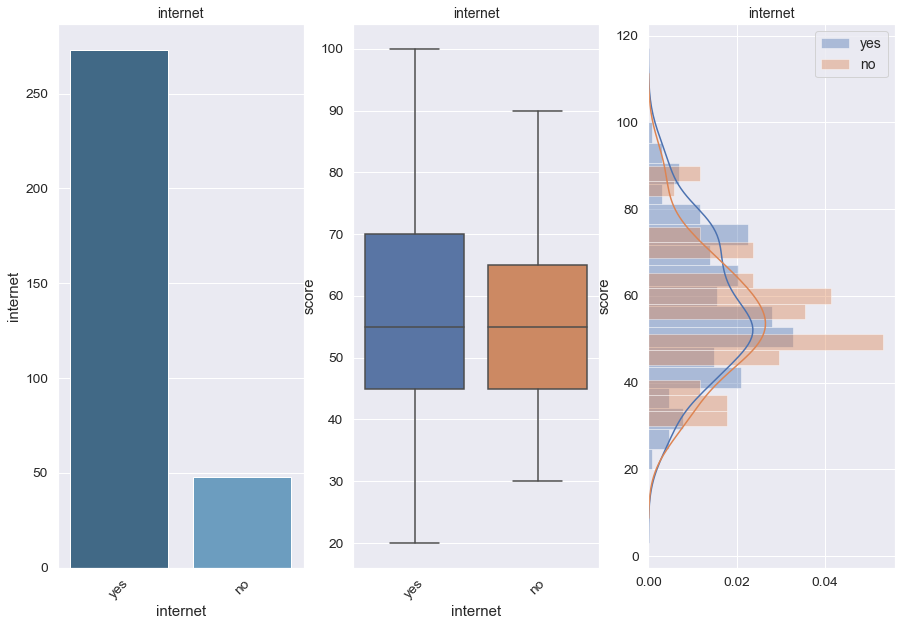

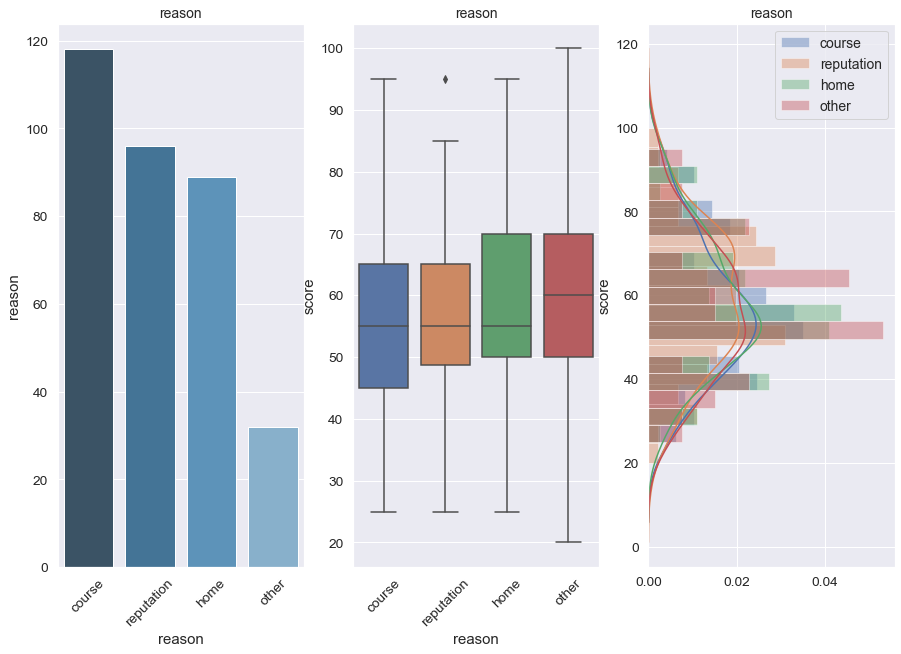

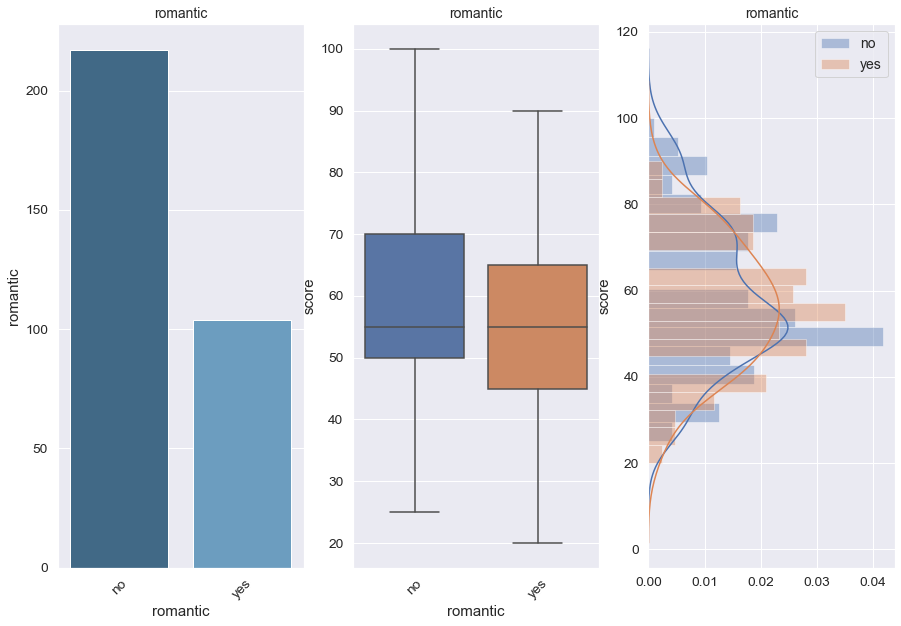

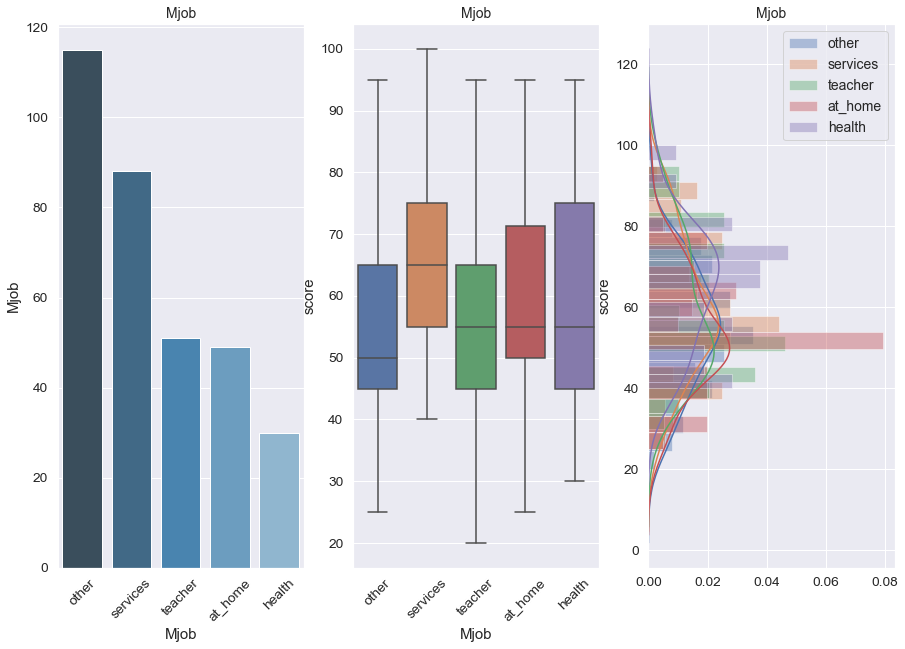

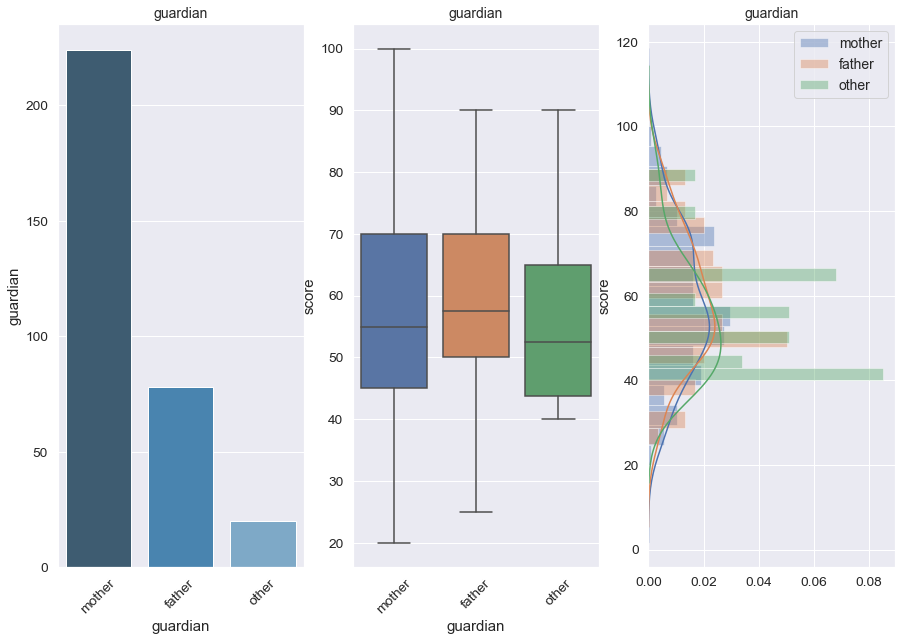

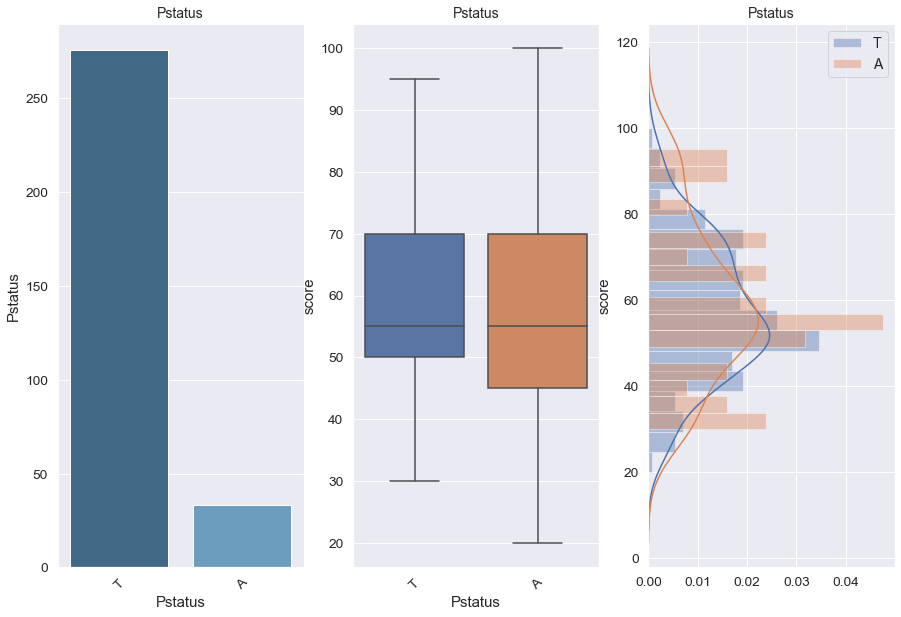

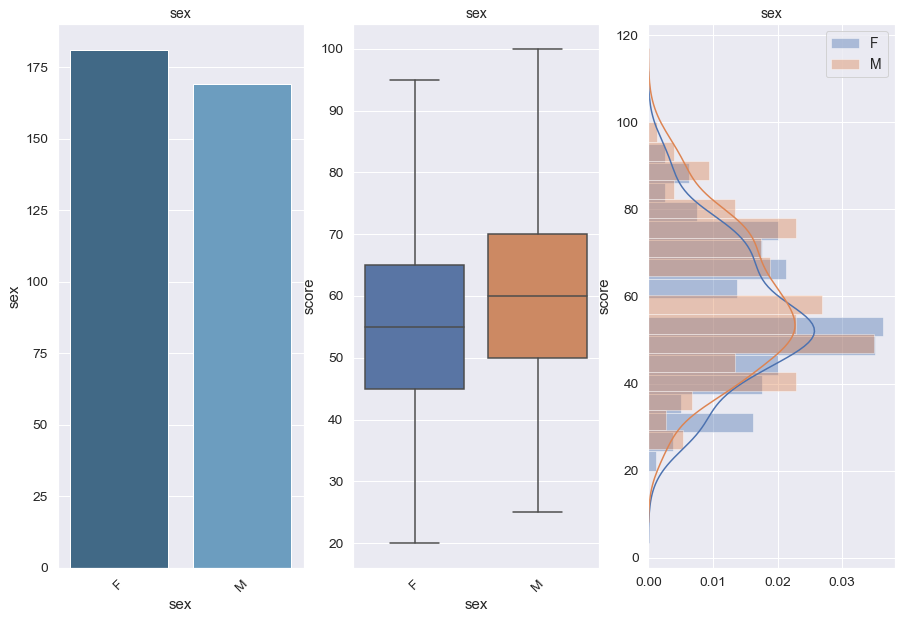

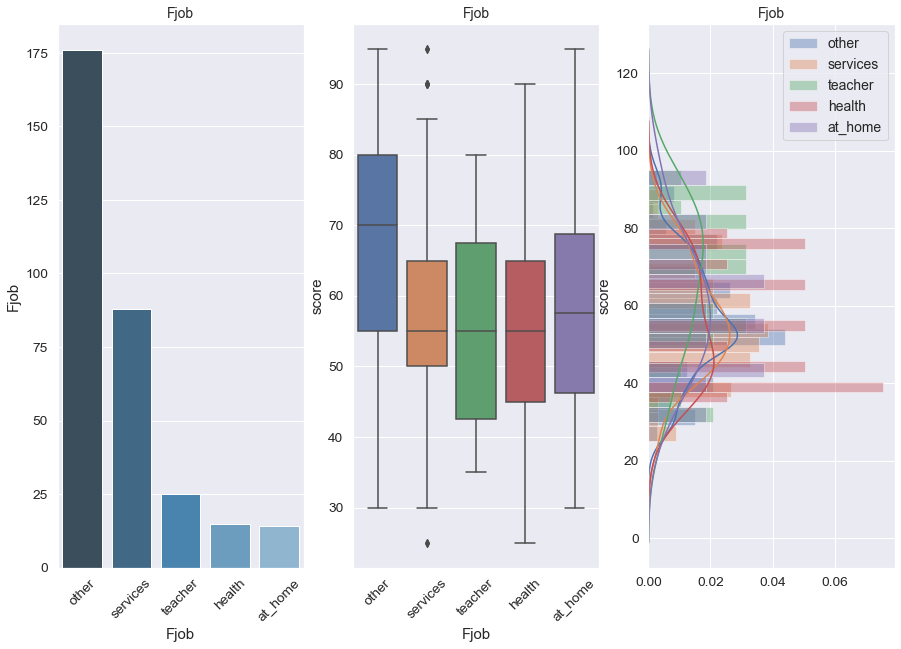

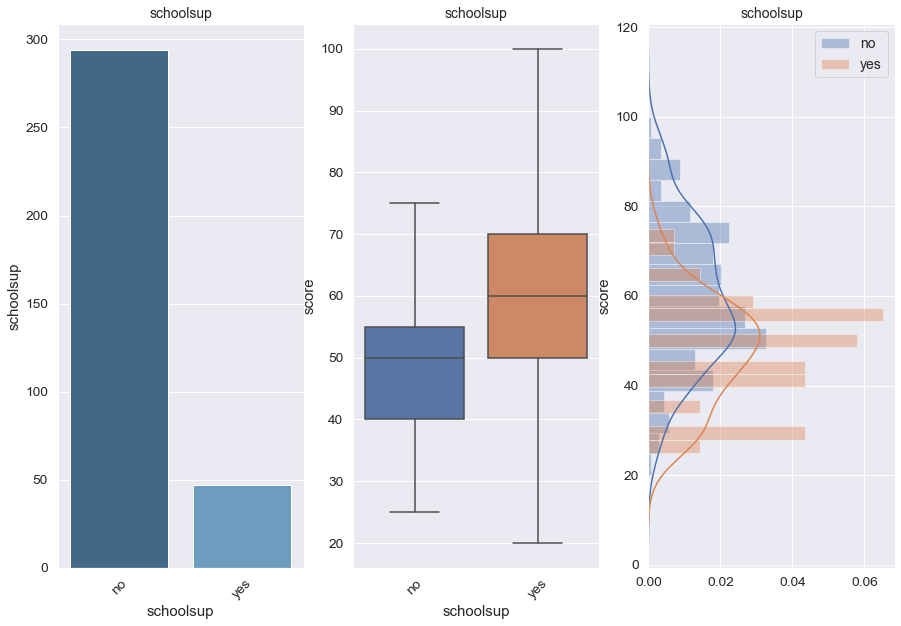

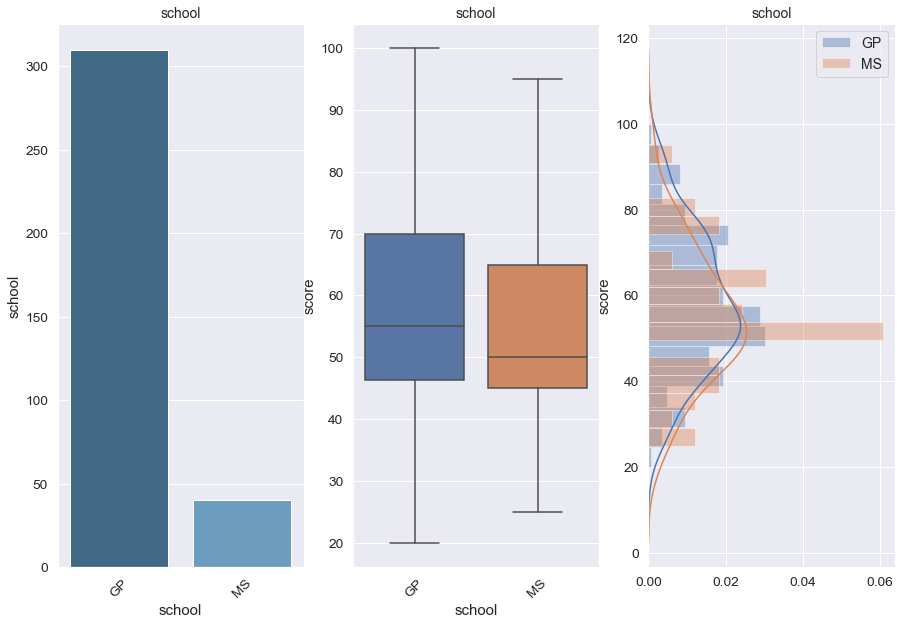

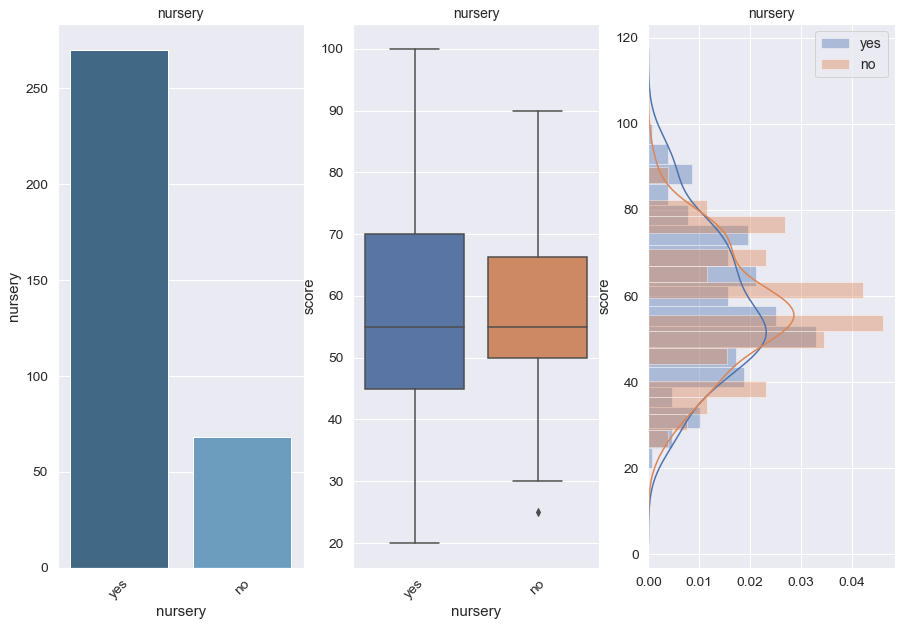

In [38]:
class_balance_threshold = 3

imbalance_features = []

for item in features_one_hot:
    imbalance = one_hot_variable_analysis(data_present, item, target_name, 
                                          n_bins=17, class_balance_threshold=class_balance_threshold)
    if imbalance > class_balance_threshold:
        imbalance_features.append(item)
        
imbalance_features.append({'class_balance_threshold': class_balance_threshold})

The list of categorical variables suspected in class imbalance and class imbalance threshold:

In [39]:
imbalance_features

['higher',
 'failures',
 'address',
 'internet',
 'guardian',
 'Pstatus',
 'Fjob',
 'schoolsup',
 'school',
 'nursery',
 {'class_balance_threshold': 3}]

#### 3.2.2.1 The simplest comparison of distributions

Two distributions are equal if:
- mean values differ in more than a half of `score` 'quantum' (i.e., 2.5) and
- standard deviations differ in more than one `score` 'quantum' (i.e., 5).

In [40]:
def distrib_equality_simplest(df, item, target_name, threshold=5):
    means = df.groupby(item)[target_name].mean()
    if means.max() - means.min() > threshold/2:
        print("! Distributions for different values of '{}' are NOT similar:\n    mean.max() - mean.min() = {:.2f}"
              .format( item, means.max() - means.min() ))
        return False
    else:
        stds = df.groupby(item)[target_name].std()
        if stds.max() - stds.min() > threshold:
            print("! Distributions for different values of '{}' are NOT similar:\n    std.max() - std.min() = {:.2f}"
                  .format( item, stds.max() - stds.min() ))
            return False
        else:
            print("Distributions for different values of '{}' are SIMILAR:\n    mean.max() - mean.min() = {:.2f}\
                \n    std.max() - std.min() = {:.2f}"
                  .format(item, means.max() - means.min(), stds.max() - stds.min() ))
            return True

In [41]:
# testing in situ

print('item:', item)
print('target_name:', target_name, "\n")

item: nursery
target_name: score 



In [42]:
useless_variables_simplest = []

for item in features_one_hot:
    print("\n"*3, "===", item, "===   ")
    distributions_are_equal = distrib_equality_simplest(data_present, item, target_name)
#     print('distributions_are_equal', distributions_are_equal)
    if distributions_are_equal:
        print("TO DROP:", item)
        useless_variables_simplest.append(item)




 === higher ===   
! Distributions for different values of 'higher' are NOT similar:
    mean.max() - mean.min() = 8.80



 === activities ===   
Distributions for different values of 'activities' are SIMILAR:
    mean.max() - mean.min() = 2.06                
    std.max() - std.min() = 0.55
TO DROP: activities



 === failures ===   
! Distributions for different values of 'failures' are NOT similar:
    mean.max() - mean.min() = 17.95



 === famsize ===   
Distributions for different values of 'famsize' are SIMILAR:
    mean.max() - mean.min() = 1.15                
    std.max() - std.min() = 0.19
TO DROP: famsize



 === address ===   
! Distributions for different values of 'address' are NOT similar:
    mean.max() - mean.min() = 5.43



 === famsup ===   
Distributions for different values of 'famsup' are SIMILAR:
    mean.max() - mean.min() = 1.53                
    std.max() - std.min() = 0.48
TO DROP: famsup



 === paid ===   
Distributions for different values of 'paid

According to the simplest criterion of inequality of distributions, different values of some variables lead to the same distributions of the target attribute. That is, various values of a variable can be replaced by one, and therefore we can drop this variable.

List of these variables:

In [43]:
useless_variables_simplest

['activities', 'famsize', 'famsup', 'paid', 'romantic', 'Pstatus', 'nursery']

In [44]:
data_pres_simplest = data_present.drop(useless_variables_simplest, axis=1)
features_one_hot_set_simplest = features_one_hot_set - set(useless_variables_simplest)
features_one_hot_simplest = list(features_one_hot_set)
data_pres_simplest

,school,sex,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,...,schoolsup,"studytime, granular",higher,internet,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,4.0,4.0,at_home,teacher,course,mother,...,yes,-6.0,yes,NaN,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,1.0,1.0,at_home,other,course,father,...,no,-6.0,yes,yes,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,1.0,1.0,at_home,other,other,mother,...,yes,-6.0,yes,yes,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,4.0,2.0,health,NaN,home,mother,...,no,-9.0,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,3.0,3.0,other,other,home,father,...,no,-6.0,yes,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,3.0,1.0,teacher,services,course,mother,...,no,-6.0,yes,yes,4.0,3.0,4.0,1.0,0.0,40.0
391,MS,M,17,U,3.0,1.0,services,services,course,mother,...,no,-3.0,yes,yes,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,1.0,1.0,other,other,course,NaN,...,NaN,-3.0,NaN,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,3.0,2.0,services,other,course,mother,...,no,-3.0,yes,yes,4.0,4.0,1.0,5.0,0.0,50.0


#### 3.2.2.2 The statistical comparison of distributions

We need to check the validity of the following hypotheses with statistical tests for two distributions of target feature for two classes:

A. Is the each distribution is normal ([Shapiro–Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)) `scipy.stats.shapiro`
  1. If `True` (distributions are normal), then: Are standard deviations equal ([Bartlett's test](https://en.wikipedia.org/wiki/Bartlett%27s_test), mean values are inknown) `scipy.stats.bartlett`
  2. If `True` (standard deviations are equal), then: Are mean values are equal ([Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test)) `scipy.stats.ttest_rel`


B. If distributions are not normal, then (there are another possible variants, e.g., depending on the sample size) in our case:
  1. Are standard deviations equal ([Levene's test](https://en.wikipedia.org/wiki/Levene%27s_test)) `scipy.stats.levene`
  2. If `True` (standard deviations are equal), then: Are mean values are equal ([Welch's t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test)) `- I do not know the *Python* realization of this test.
  
Since - as it was told above - the different variants are possiblle, the other "if-else" chains can be realized.

We implement a function that performs the statistical verification of the equality of the distribution of classes, described above. It should return a DataFrame (square matrix) with classes as row and column indices and values: 1 (*True* to the question: "Are the distributions of the corresponding classes statistically equal?") - and 0 (*False*).

In [45]:
from scipy.stats import shapiro, bartlett, ttest_ind_from_stats, levene



def check_normality(x, alpha):
    stat, p_value = shapiro(x)
    if p_value > alpha:
        return True # Sample looks Gaussian
    else:
        return False # Sample does NOT look Gaussian


def normal_std_are_equal(x, y, alpha):
    stat, p_value = bartlett(x, y)
    if p_value > alpha:
        return True # Deviations of normal samples are equal
    else:
        return False # Deviations of normal samples are NOT equal

    
    
def normal_means_are_equal(x, y, alpha):
    stat, p_value = ttest_ind_from_stats(x.mean(), x.std(), len(x), y.mean(), y.std(), len(y), equal_var=True)
    if p_value > alpha:
        return True # Means of normal samples are equal
    else:
        return False # Means of normal samples are NOT equal

        
def abnormal_std_are_equal(x, y, alpha):
    stat, p_value = levene(x, y)
    if p_value > alpha:
        return True # Deviations of samples are equal
    else:
        return False # Deviations of samples are NOT equal


def abnormal_means_are_equal(x, y, alpha):
    
    # I do not the Welch's test in SciPy, therefore my test wil be as follows
    # 1. Claculate the standard deviation (std_{xy}) for joined sample of x and y.
    # 2. If abs( y.mean() - x.mean() ) < alpha * std_{xy}, then x and y are similar, otherwise they are not
    
    x = np.array(x).flatten()    
    y = np.array(y).flatten()
    xy = np.hstack((x, y))
    
    if np.abs( y.mean() - x.mean() ) < alpha*xy.std():
        return True # Means of normal samples are equal
    else:
        return False # Means of normal samples are NOT equal



def distrib_equality(tested_series, alpha):
    n_var = len(tested_series.value_counts().index)
    equality_matrix = np.eye((n_var))

    for i in range(n_var - 1):
        instance_x = tested_series.value_counts().index[i]
        x = df[ tested_series == instance_x ][target_name]
        for j in range(n_var):
            if j > i:
                instance_y = tested_series.value_counts().index[j]
                y = df[ tested_series == instance_y ][target_name]
                normality_x = check_normality(x, alpha)
                normality_y = check_normality(y, alpha)
#                 print("Does '{}' with {} entities is distributed normally? - {}"
#                       .format( instance_x, len(x), normality_x ))
#                 print("Does '{}' with {} entities is distributed normally? - {}"
#                       .format( instance_y, len(y), normality_y ))
#                 print("Does '{}' and {} are distributed normally both? - {}"
#                       .format( instance_x, instance_y, normality_x & normality_y ))


                if normality_x & normality_y:
                    #
                    # both distributions are normal = True
                    #
                    equal_std = normal_std_are_equal(x, y, alpha)
#                     print("  Does '{}' and '{}' have the same STD? - {}"
#                           .format( instance_x, instance_y, equal_std ))

                    if equal_std:
                        equal_mean = normal_means_are_equal(x, y, alpha)
#                         print("    Does '{}' and '{}' have the same MEAN? - {}"
#                               .format( instance_x, instance_y, equal_mean ))
                        if equal_mean:
                            equality_matrix[i][j] = 1
                            equality_matrix[j][i] = 1

                else:
                    #
                    # both distributions are normal = False
                    #
                    equal_std = abnormal_std_are_equal(x, y, alpha)
#                     print("__Does '{}' and '{}' have the same STD? - {}"
#                           .format( instance_x, instance_y, equal_std ))
                    if equal_std:
                        equal_mean = abnormal_means_are_equal(x, y, alpha)
#                         print("____Does '{}' and '{}' have the same MEAN? - {}"
#                               .format( instance_x, instance_y, equal_mean ))
                        if equal_mean:
                            equality_matrix[i][j] = 1
                            equality_matrix[j][i] = 1
            
#                 print("\n"*2, "=== "*3)

    equality_df = pd.DataFrame(equality_matrix, columns=tested_series.value_counts().index, 
                               index=tested_series.value_counts().index , dtype=int)
    return equality_df

In [46]:
### testing in situ

df = data_present
target_name = 'score'
item = 'reason'

print(item)
df[item].value_counts()

alpha = 0.05
tested_series = df[item]

eqaulity_df = distrib_equality(tested_series, alpha)
eqaulity_df

reason


,course,reputation,home,other
course,1,0,0,1
reputation,0,1,0,1
home,0,0,1,0
other,1,1,0,1


In [47]:
### testing in situ
#
# If statistical tests admitted that all features have equal distributions, than
# all coefficients of equality matrix are equal to 1. 
# And the sum of all elements is N^2 (N is the size of matrix).

if eqaulity_df.sum().sum() < len(eqaulity_df)**2:
    print("Values are not equal, they have different distributions.")
else:
    print("All distributions for values are equal! \n \
    There is no difference between other values in this column and \n     you can drop this feature. ")

Values are not equal, they have different distributions.


In [48]:
def column_align(x):
    # x is a list
    column_length = 0
    for y in x:
        if len(y) > column_length:
            column_length = len(y)
    return column_length

In [49]:
# print(column_align(features_one_hot))
features_one_hot

['higher',
 'activities',
 'failures',
 'famsize',
 'address',
 'famsup',
 'paid',
 'internet',
 'reason',
 'romantic',
 'Mjob',
 'guardian',
 'Pstatus',
 'sex',
 'Fjob',
 'schoolsup',
 'school',
 'nursery']

In [50]:
alpha = 0.05

useless_variables_stat = []

for item in features_one_hot:
    eqaulity_df = distrib_equality(data_present[item], alpha)
    if eqaulity_df.sum().sum() < len(eqaulity_df)**2:
        print(item, " "*(column_align(features_one_hot)-len(item)),
              ": All values are not equal, they have different distributions.\n")
    else:
        useless_variables_stat.append(item)
        print(item, " "*(column_align(features_one_hot)-len(item)),
              ": All distributions for values are equal! \n".upper(), 
              " "*(column_align(features_one_hot)+2),
              "There is no difference between other values in this column and you can drop this feature.\n")

higher      : All values are not equal, they have different distributions.

activities  : All values are not equal, they have different distributions.

failures    : All values are not equal, they have different distributions.

famsize     : All values are not equal, they have different distributions.

address     : All values are not equal, they have different distributions.

famsup      : All values are not equal, they have different distributions.

paid        : ALL DISTRIBUTIONS FOR VALUES ARE EQUAL! 
              There is no difference between other values in this column and you can drop this feature.

internet    : All values are not equal, they have different distributions.

reason      : All values are not equal, they have different distributions.

romantic    : All values are not equal, they have different distributions.

Mjob        : All values are not equal, they have different distributions.

guardian    : All values are not equal, they have different distributions.

Psta

In [51]:
print("According to the statistical criterion, the variables with statistically equal classes are:", 
      useless_variables_stat)

According to the statistical criterion, the variables with statistically equal classes are: ['paid']


In [52]:
data_pres_stat = data_present.drop(useless_variables_stat, axis=1)
features_one_hot_set_stat = features_one_hot_set - set(useless_variables_stat)
features_one_hot_stat = list(features_one_hot_set_stat)
data_pres_stat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,...,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Hereafter we will work with the **stud_math_pres_stat** - when the identity of class distributions has been checked statistically.

## 4 Correlation matrix

The correlation matrix can help to identify either a strong relationship of values, or to suspect a lack of correlation between values.

In [53]:
corr_matrix = data_pres_stat.corr()
corr_matrix

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.119805,-0.126771,1.006847e-01,-0.011198,0.219082,0.011198,0.061178,-0.009554,0.116400,-6.008110e-02,0.211007,-0.125073
Medu,-0.119805,1.000000,0.607425,-1.687540e-01,0.070391,-0.203566,-0.070391,-0.008563,0.024449,0.078836,-3.818591e-02,0.073974,0.189611
Fedu,-0.126771,0.607425,1.000000,-1.459770e-01,-0.010801,-0.267314,0.010801,-0.012054,-0.027535,0.048275,1.973149e-02,0.029999,0.132700
traveltime,0.100685,-0.168754,-0.145977,1.000000e+00,-0.101815,0.097375,0.101815,-0.031726,-0.020219,0.027433,-9.164625e-17,-0.007783,-0.074284
studytime,-0.011198,0.070391,-0.010801,-1.018153e-01,1.000000,-0.157706,-1.000000,0.057521,-0.129052,-0.030048,-8.550523e-02,-0.078282,0.142932
failures,0.219082,-0.203566,-0.267314,9.737545e-02,-0.157706,1.000000,0.157706,-0.006089,0.114818,0.119779,6.146773e-02,0.136301,-0.285775
"studytime, granular",0.011198,-0.070391,0.010801,1.018153e-01,-1.000000,0.157706,1.000000,-0.057521,0.129052,0.030048,8.550523e-02,0.078282,-0.142932
famrel,0.061178,-0.008563,-0.012054,-3.172642e-02,0.057521,-0.006089,-0.057521,1.000000,0.152812,0.029717,1.043711e-01,-0.063147,0.055476
freetime,-0.009554,0.024449,-0.027535,-2.021871e-02,-0.129052,0.114818,0.129052,0.152812,1.000000,0.294042,7.099844e-02,-0.081612,-0.007407
goout,0.116400,0.078836,0.048275,2.743342e-02,-0.030048,0.119779,0.030048,0.029717,0.294042,1.000000,-1.344627e-02,0.044601,-0.173015


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 <a list of 13 Text yticklabel objects>)

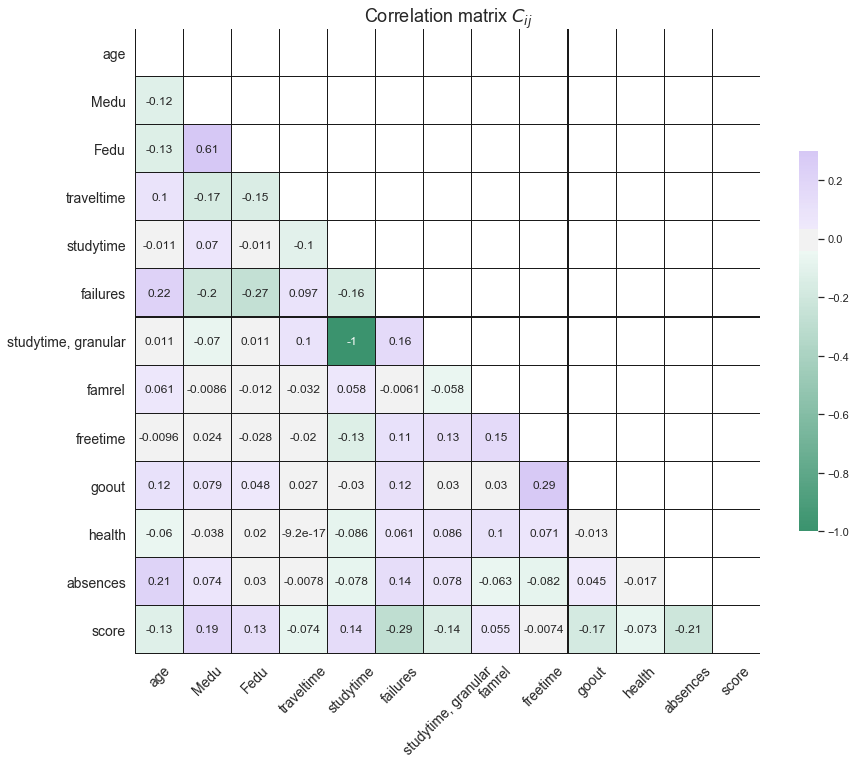

In [54]:
sns.set(style='whitegrid', palette="RdBu_r")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(14, 14))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(240, 10, as_cmap=True)
cmap = sns.diverging_palette(150, 275, s=80, l=55, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, vmax=.3, center=0, cmap=cmap, 
            annot=True, square=True, linewidths=0.1, linecolor='k', cbar_kws={"shrink": .5})

ax.set_title("Correlation matrix $C_{ij}$", fontsize=FONT_SIZE+4)
plt.xticks(rotation=45,  fontsize=FONT_SIZE) 
plt.yticks(fontsize=FONT_SIZE) 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 <a list of 13 Text yticklabel objects>)

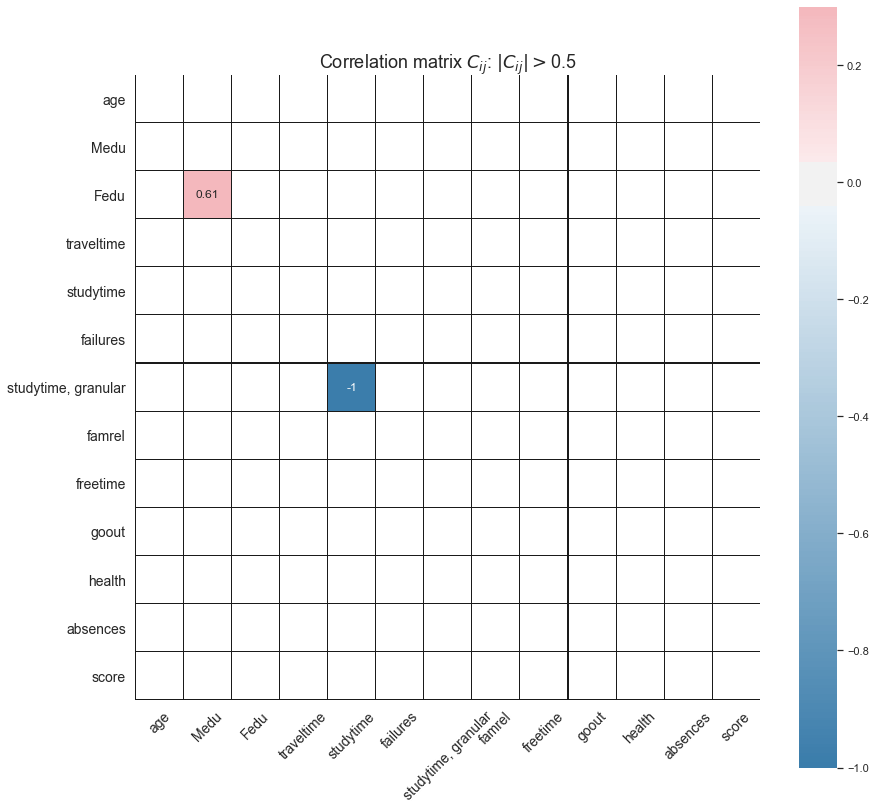

In [55]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(14, 14))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(240, 10, as_cmap=True)
cmap = sns.diverging_palette(240, 10, s=80, as_cmap=True)

low_lim = 0.5
sns.heatmap(corr_matrix[ abs(corr_matrix) > low_lim ], mask=mask, cmap=cmap, vmax=.3, center=0,
            annot=True, square=True, linewidths=0.1, linecolor='k')#, cbar_kws={"shrink": .5})

ax.set_title("Correlation matrix $C_{ij}$: $|C_{ij}|>$"+str(low_lim), fontsize=FONT_SIZE+4)
plt.xticks(rotation=45,  fontsize=FONT_SIZE) 
plt.yticks(fontsize=FONT_SIZE) 

The hypothesis of the correlation between `studytime, granular` and` studytime` was confirmed: the correlation is pefect. Therefore, drop `studytime, granular`.

There are 28 features left.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 <a list of 13 Text yticklabel objects>)

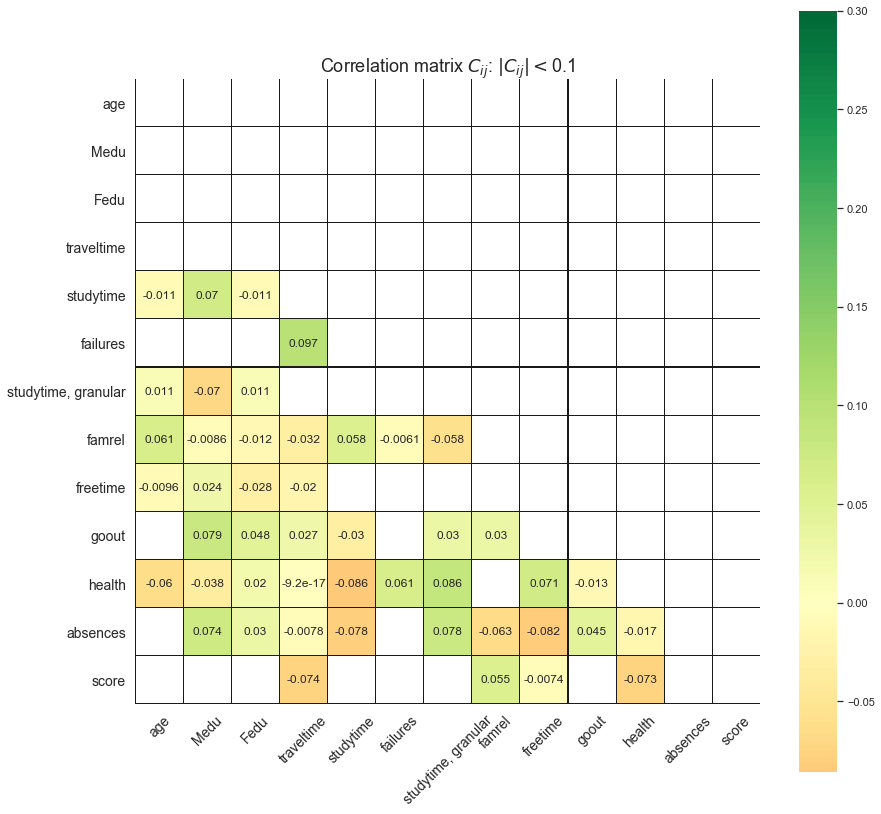

In [56]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(14, 14))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(240, 10, as_cmap=True)
# cmap = sns.diverging_palette(150, 275, s=80, as_cmap=True)
# cmap = sns.diverging_palette(20, 275, s=80, as_cmap=True)
cmap = sns.color_palette("RdYlGn", 200)

upp_lim = 0.1
sns.heatmap(corr_matrix[ abs(corr_matrix) < upp_lim ], mask=mask, cmap=cmap, vmax=.3, center=0,
            annot=True, square=True, linewidths=0.1, linecolor='k')#, cbar_kws={"shrink": .5})

ax.set_title("Correlation matrix $C_{ij}$: $|C_{ij}|<$"+str(upp_lim), fontsize=FONT_SIZE+4)
plt.xticks(rotation=45,  fontsize=FONT_SIZE) 
plt.yticks(fontsize=FONT_SIZE) 

And once again, a very small correlation coefficient between `freetime` and the target feature (`score`) attracts attention (absolute value is just 0.0074).

==== freetime ====

Pearson correlation coefficient between 'freetime' and 'score' is -0.0074. 

freetime
1.0     16
2.0     59
3.0    131
4.0    102
5.0     34
Name: freetime, dtype: int64 

There are 8 missing values in 'freetime'. 




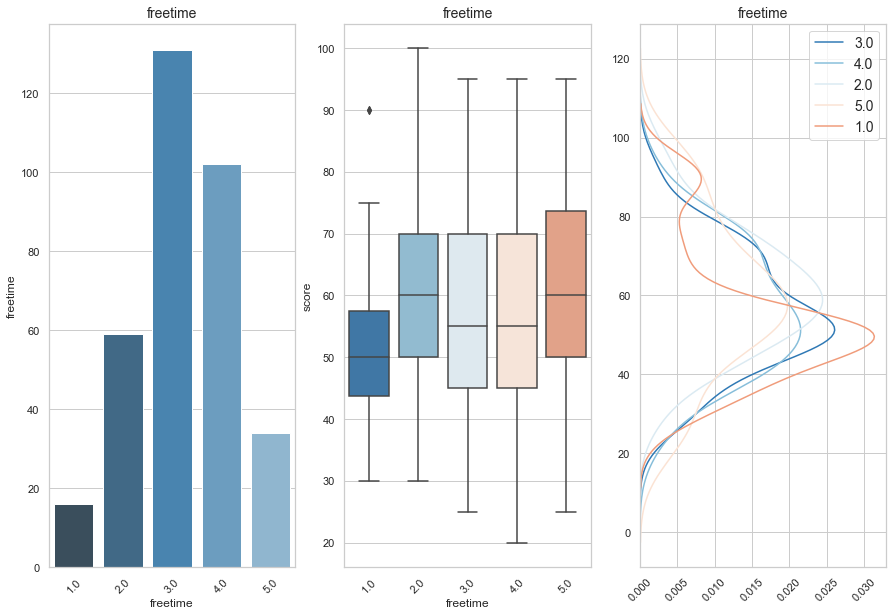

In [57]:
ordinal_variable_analysis(data_pres_stat, 'freetime', target_name)

(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 11 Text yticklabel objects>)

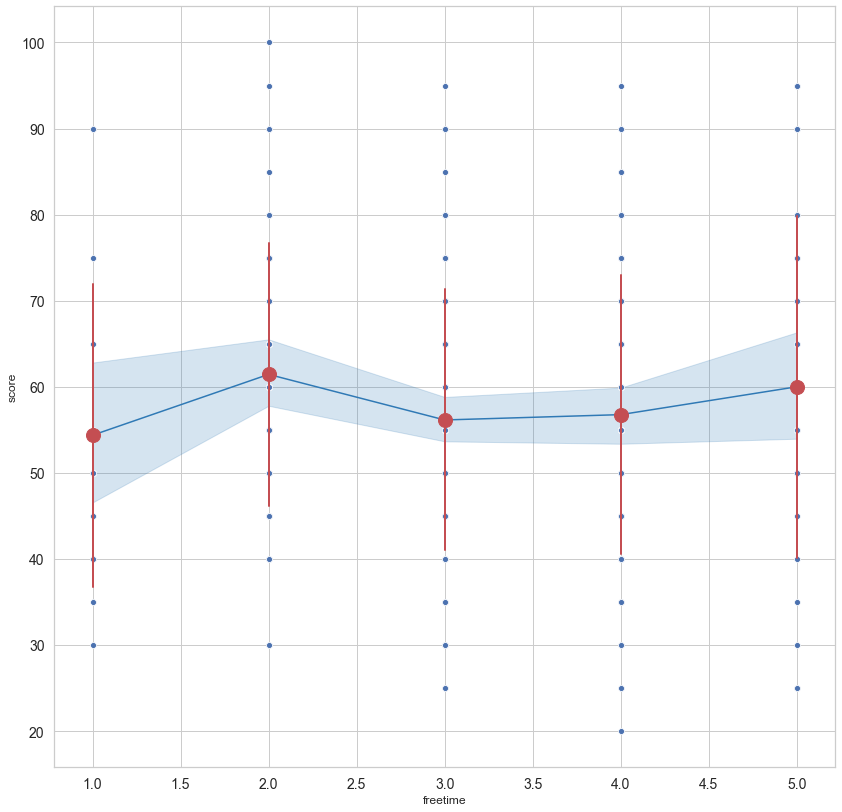

In [58]:
fig, ax = plt.subplots(figsize=(14, 14))

x = data_pres_stat.groupby('freetime')[target_name].mean().index
y = data_pres_stat.groupby('freetime')[target_name].mean().values
s = data_pres_stat.groupby('freetime')[target_name].std().values

sns.lineplot(x='freetime', y=target_name, data=data_pres_stat)

plt.plot(x, y, 'or', markersize=14)#, label="Mean values for different classes")
for k, z in enumerate(s):
    plt.plot([x[k], x[k]], [y[k]-z, y[k]+z], '-r', linewidth=2)#, label="Mean values for different classes $\pm$ std")

sns.scatterplot(x='freetime', y=target_name, data=data_pres_stat, color='b')


# plt.legend(fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE) 
plt.yticks(fontsize=FONT_SIZE)

However, as we observe from the `boxplot` and the distributions for classes, these are different classes and an almost zero *linear correlation coefficient* suggests that (perhaps):
- this is a non-linear dependence (the dependence of the averages on the class gives this cue),
- correlations between classes compensate each other.

One way or another, there is no reason to drop this feature.

In the long run, one can check the influence of this feature to the target feature by:
- constructing a model with this feature,
- the same, but without it
- comparison.

Note, that the linear regression model can fail due to the possible nonlinear dependence mentioned above.

In [59]:
# Restore basic plot settings

sns.set(style='darkgrid', palette="bright")

In [60]:
for item in ['traveltime', 'studytime, granular', 'health']:
    print("=== ", item, " ===\n")
    print(abs(corr_matrix[item]).sort_values(ascending=False)[1:], "\n"*2)

===  traveltime  ===

Medu                   1.687540e-01
Fedu                   1.459770e-01
studytime              1.018153e-01
studytime, granular    1.018153e-01
age                    1.006847e-01
failures               9.737545e-02
score                  7.428418e-02
famrel                 3.172642e-02
goout                  2.743342e-02
freetime               2.021871e-02
absences               7.783288e-03
health                 9.164625e-17
Name: traveltime, dtype: float64 


===  studytime, granular  ===

studytime     1.000000
failures      0.157706
score         0.142932
freetime      0.129052
traveltime    0.101815
health        0.085505
absences      0.078282
Medu          0.070391
famrel        0.057521
goout         0.030048
age           0.011198
Fedu          0.010801
Name: studytime, granular, dtype: float64 


===  health  ===

famrel                 1.043711e-01
studytime, granular    8.550523e-02
studytime              8.550523e-02
score                  7.313494e

In [61]:
%%time
data_pres_stat = data_pres_stat.drop(['studytime, granular'], axis=1)
features_ordinal_set = features_ordinal_set - set(['studytime, granular'])
features_ordinal = list(features_ordinal_set)
data_pres_stat

Wall time: 2 ms


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,...,yes,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Let us sort features in decreasing order of linear correlation coefficient (with the target feature) for clarity. It helps us to understand the degree of *linear* influence of the variable (for which one can calculate the Pearson coefficient of linear correlation) on the target attribute.

In [62]:
abs(corr_matrix[target_name]).sort_values(ascending=False)[1:]

failures               0.285775
absences               0.214926
Medu                   0.189611
goout                  0.173015
studytime              0.142932
studytime, granular    0.142932
Fedu                   0.132700
age                    0.125073
traveltime             0.074284
health                 0.073135
famrel                 0.055476
freetime               0.007407
Name: score, dtype: float64

In [63]:
12*11/2

66.0

For the sake of completeness, we build `pairplot`, although in this particular case (an abundance of categorical variables, `scatterplot` for numerical variables have already been built) it is unlikely to provide additional information. And there will be $ 12 \cdot 11/2 = 66 $ unique plots... Not as much as they could, but... Usually, such kind of plot is usefull for numerical (*continuous*) variables. But what the hell?!...

Wall time: 7.2 s


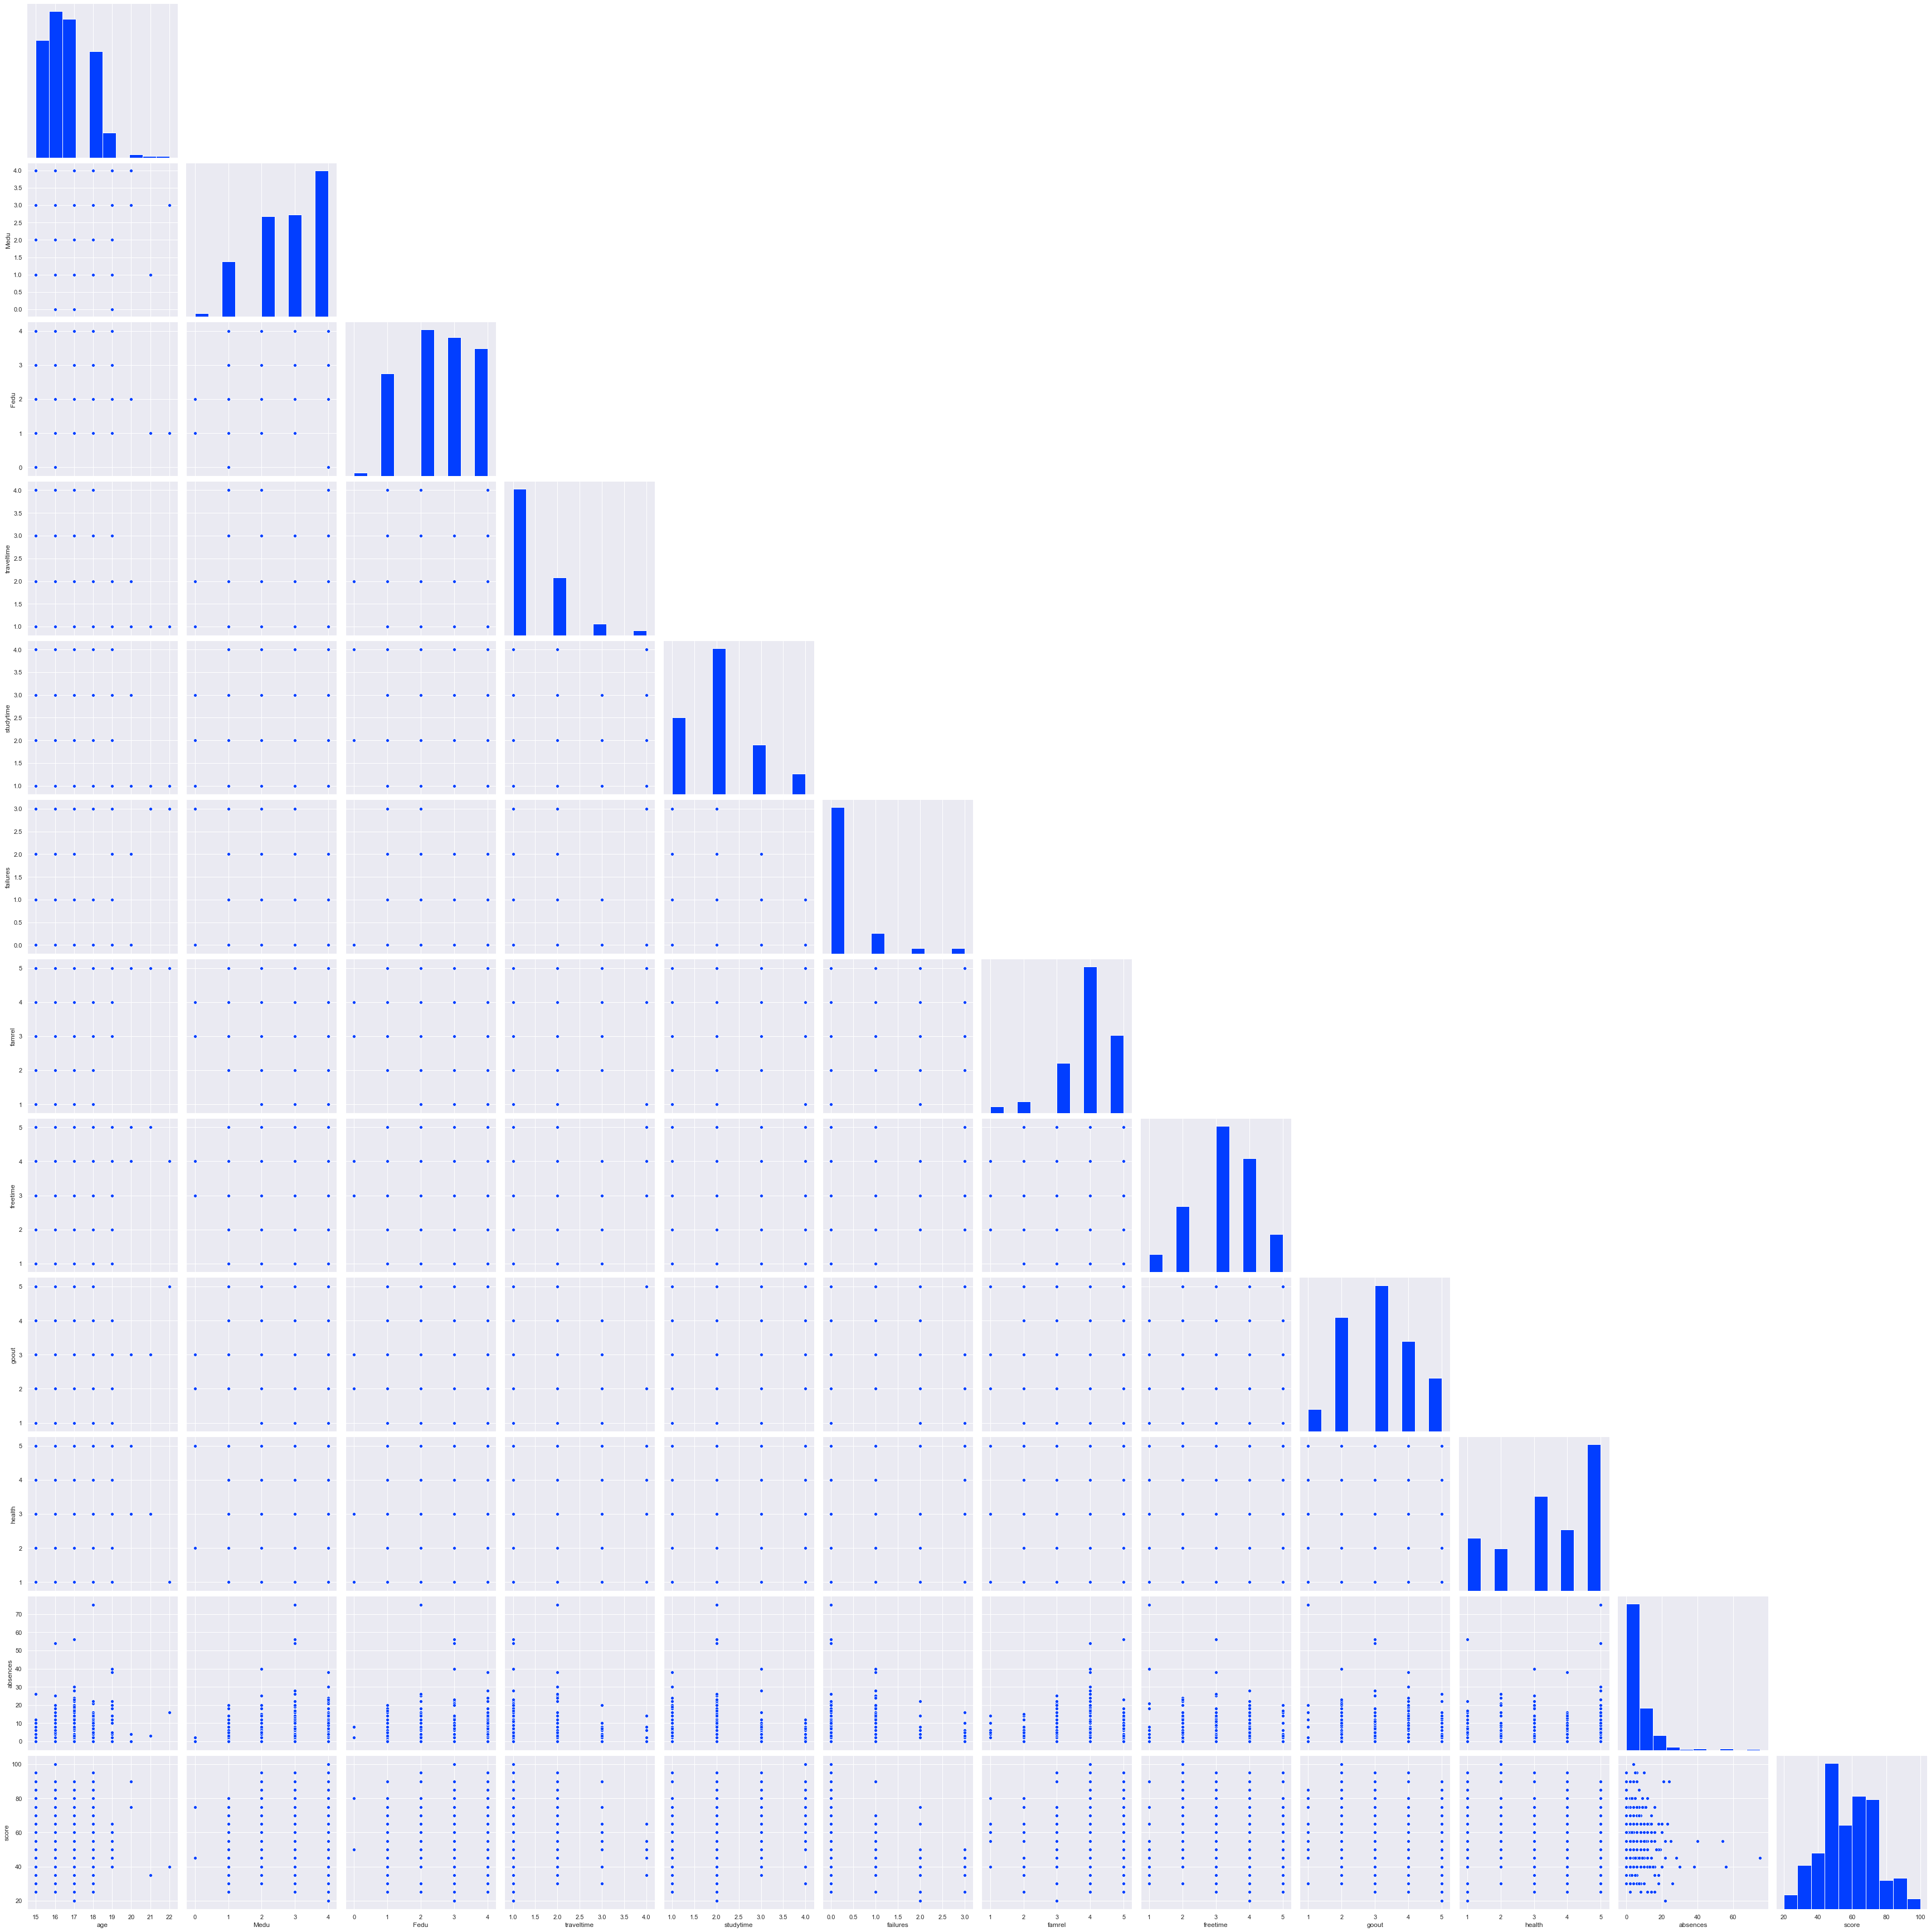

In [64]:
%%time

sns.pairplot(data_pres_stat, corner=True, height=4)

No miracle happened. I did not find any new information.

## 5. Missing values. The Final.

Let us check the number of missing values.

In [65]:
data_pres_stat.isna().sum()

school         0
sex            0
age            0
address       14
famsize       24
Pstatus       41
Medu           2
Fedu          21
Mjob          17
Fjob          32
reason        15
guardian      28
traveltime    23
studytime      7
failures      20
schoolsup      9
famsup        35
activities    12
nursery       12
higher        19
internet      29
romantic      29
famrel        24
freetime       8
goout          6
health        13
absences      10
score          0
dtype: int64

In [66]:
print("The maximal number of missing values ({} - {:.1%}) was found in '{}'."
      .format( data_pres_stat.isna().sum().max(), 
              data_pres_stat.isna().sum().max()/len(data_present),
              data_pres_stat.isna().sum().idxmax() ))
print("If we drop these missing values it will increase STD by {:.1%}'."
      .format( 1/(1-data_pres_stat.isna().sum().max()/len(data_present))**0.5 - 1 ))

The maximal number of missing values (41 - 11.7%) was found in 'Pstatus'.
If we drop these missing values it will increase STD by 6.4%'.


Since the maximum number of missing values (41 in the 'Pstatus') is 11.7%, it would seem that you can drop these entities. In particular, it will lead to the increase in standard deviation by only 6.4% ($ 1/\sqrt{1-0.117}\simeq 1.064$).

However, missing values are scattered wide on different features and may not overlap. Check how many records will be lost if we use `dropna ()`.

In [67]:
drop_mask = data_pres_stat.isna().sum(axis=1)

def drop_mask_create(x):
    if x > 0:
        return True
    else:
        return False

drop_mask = drop_mask.apply(drop_mask_create)
print("Application of the 'dropna()' will result in dropping of {} entries ({:.1%})."
      .format( drop_mask.sum(), drop_mask.sum()/len(drop_mask) ))

Application of the 'dropna()' will result in dropping of 248 entries (70.9%).


It is unacceptable.

We should impute missing values. Amongst imputation methods that I know:
- impute with constant value (`SimpleImputer` or `fillna()`)
- k-nearest neigbours imputation (`KNNImputer`)
- imputation using feature distribution

let us use the first at first, since
- k-nearest neigbours imputation method implies usage of normalized data, and to normalize categorical features we should code them before.
- imputation using feature distribution requires a lot of work to fit the distribution. We will do it later, if it will be possible.

## 5.1 Imputation with constant value

Let us impute missing values with a constant value ising `fillna ()`:

- For numerical variables, impute missing values with the mean value. Although such an imputation will distort the distribution, it will at least leave the mean value unchanged and the future model will predict results for inputs close to the average good.
- For categorical variables, impute missing values with the most frequent value. This approach increases class imbalance, but due to the large amount of these dominant data, the distribution will be less distorted. After imputation of missing values, it will be necessary to again (finally) check the imbalance of the classes.

In [68]:
data_const = data_pres_stat.copy()

In [69]:
for item in features_numerical:
    data_const[item] = data_const[item].fillna(value=data_const[item].mean())

In [70]:
for item in features_ordinal:    
    print("In '{}' NA is substituted with {}.".format(item, data_const[item].value_counts().idxmax()), "\n")
    data_const[item] = data_const[item].fillna(value=data_const[item].value_counts().idxmax())

In 'studytime' NA is substituted with 2.0. 

In 'freetime' NA is substituted with 3.0. 

In 'Fedu' NA is substituted with 2.0. 

In 'goout' NA is substituted with 3.0. 

In 'health' NA is substituted with 5.0. 

In 'traveltime' NA is substituted with 1.0. 

In 'famrel' NA is substituted with 4.0. 

In 'Medu' NA is substituted with 4.0. 



In [71]:
for item in features_one_hot_stat:
    print("In '{}' NA is substituted with '{}'.".format(item, data_const[item].value_counts().idxmax()), "\n")
    data_const[item] = data_const[item].fillna(value=data_const[item].value_counts().idxmax())

In 'failures' NA is substituted with '0.0'. 

In 'famsize' NA is substituted with 'GT3'. 

In 'famsup' NA is substituted with 'yes'. 

In 'reason' NA is substituted with 'course'. 

In 'romantic' NA is substituted with 'no'. 

In 'Mjob' NA is substituted with 'other'. 

In 'guardian' NA is substituted with 'mother'. 

In 'nursery' NA is substituted with 'yes'. 

In 'school' NA is substituted with 'GP'. 

In 'higher' NA is substituted with 'yes'. 

In 'activities' NA is substituted with 'yes'. 

In 'address' NA is substituted with 'U'. 

In 'internet' NA is substituted with 'yes'. 

In 'Pstatus' NA is substituted with 'T'. 

In 'sex' NA is substituted with 'F'. 

In 'schoolsup' NA is substituted with 'no'. 

In 'Fjob' NA is substituted with 'other'. 



## 5.2 Imputation using feature distribution

### 5.2.1 Fitting the probability density function (PDF) of numerical features (continious variables)

In [72]:
data_stat = data_pres_stat.copy()

In [73]:
# Origin: https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python
# with slight modification

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import time
# import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, n_bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=n_bins, density=True)
    print(x)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    
    print("x_min={}; x_max={}, N_x={}".format(x.min(), x.max(), len(x)))

    # Distributions to check
    # You can update this list from 
    # https://docs.scipy.org/doc/scipy/reference/stats.html
    distributions = [        
        st.alpha, st.anglit, st.arcsine,
        st.beta, st.betaprime, st.bradford, st.burr, st.burr12,
        st.cauchy, st.chi, st.chi2, st.cosine, st.crystalball,
        st.dgamma, st.dweibull,
        st.erlang, st.expon, st.exponnorm, st.exponweib, st.exponpow,
        st.f, st.fatiguelife, st.fisk, st.foldcauchy, st.foldnorm, st.frechet_r, st.frechet_l,
        st.genlogistic, st.genpareto, st.gennorm, st.genexpon, st.genextreme, st.gausshyper,
        st.gamma, st.gengamma, st.genhalflogistic, st.geninvgauss, st.gilbrat, st.gompertz, st.gumbel_r, st.gumbel_l,
        st.halfcauchy, st.halflogistic, st.halfnorm, st.halfgennorm, st.hypsecant,
        st.invgamma, st.invgauss, st.invweibull,
        st.johnsonsb, st.johnsonsu,
        st.kappa4, st.kappa3, st.ksone, st.kstwobign,
        st.laplace, st.levy, st.levy_l, 
        # st.levy_stable,  ## too long or impossible
        st.logistic, st.loggamma, st.loglaplace, st.lognorm, st. loguniform, st.lomax,
        st.maxwell, st.mielke, st.moyal, 
        st.nakagami, st.ncx2, st.ncf, st.nct, st.norm, st.norminvgauss, 
        st.pareto, st.pearson3, st.powerlaw, st.powerlognorm, st.powernorm,
        st.rdist, st.rayleigh, st.rice, st.recipinvgauss,
        st.semicircular, st.skewnorm, 
        st.t, st.trapz, st.triang, st.truncexpon, st.truncnorm, st.tukeylambda,
        st.uniform,
        st.vonmises, st.vonmises_line,
        st.wald, st.weibull_min, st.weibull_max, st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    k_distr = 0
    n_distr = len(distributions)
    t0 = time.time()
    for distribution in distributions:
        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to PLOT
#                 try:
#                     if ax:
#                         pd.Series(pdf, x).plot(ax=ax)
#                     end
#                 except Exception:
#                     pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass
        
        print("Distribution fitting: |{}{}| {:.1%} {:.3f} sec. SSE = {:.6f} for '{}'."
              .format("#"*int(40*k_distr/n_distr), " "*(40-int(40*k_distr/n_distr)), k_distr/n_distr, 
                      time.time()-t0, best_sse, str(distributions[k_distr])[32:-34]))
        k_distr += 1
    return (best_distribution.name, best_params, best_sse)


def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf


def plot_fit_pdf(data, n_bins=200):    
    # Plot for comparison
    plt.figure(figsize=(12,8))
    ax = data.plot(kind='hist', bins=n_bins, density=True, alpha=0.5)
    # Save plot limits
    dataYLim = ax.get_ylim()
    
    # Find best fit distribution
    best_fit_name, best_fit_params, best_sse = best_fit_distribution(data, n_bins, ax)
    best_dist = getattr(st, best_fit_name)
    
    # Update plots
    ax.set_ylim(dataYLim)
    ax.set_title(item)
    
    # Make PDF with best params 
    pdf = make_pdf(best_dist, best_fit_params)
    

    # Display
    plt.figure(figsize=(12,8))
    ax = pdf.plot(lw=2, label='PDF', legend=True)
    data.plot(kind='hist', bins=n_bins, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)
    
    param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
    dist_str = '{}({})'.format(best_fit_name, param_str)
    ax.set_title("Distribution of {} with fitting by {}".format(item, dist_str))
    return (best_fit_name, best_fit_params, best_sse)

The fitting of the PDF in the case of a small number of data is very sensitive to the method of modeling the "experimental" probability density (here - to the number of histogram bins).

It is demonstrated below for the *'age'* feature (bins = [7, 8, 9]). Obviously, if we choose the number of bins to be equal to the number of "experimental" values, it will provide the best result. But the crucial difference in the answer when the number of baskets changes by only one is noticeable.

For the *'absences'* feature, the fitting of PDF using histogram appeared to be failed.

**The method in this form implies further development** since it is unlikely to be suitable for unmanned apllication. Nevertheless this method looks very promising.

<div style="border:solid magenta 2px; padding: 20px"> <h1 style="color:magenta; margin-bottom:20px">In development</h1>

<span style="color:magenta">
Here the prototype of distribution fitting without histogram call. The return of experimental distribution is realized.
/One cell below/
</span>

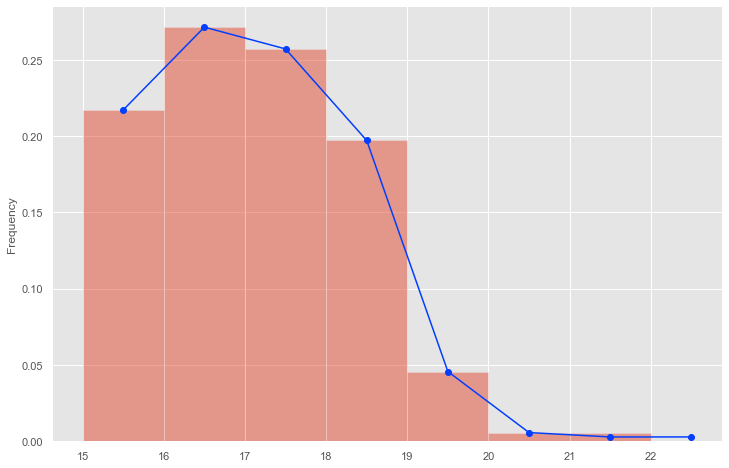

In [74]:
item = 'age'
data = data_stat[item]
n_bins = 7

data_nna = data[ data.notna() ]

# print(x.isna().sum())
# print(x.value_counts())
dx = (data_nna.max()-data_nna.min())/n_bins
upper_bin_borders = np.arange(data_nna.min(), data_nna.max(), dx)
# print(bin_borders)
# print(distrib_bin)
# bin_borders[0] = -np.inf
upper_bin_borders = np.append(upper_bin_borders, upper_bin_borders.max()+dx)
y = np.zeros(upper_bin_borders.shape)
# print(upper_bin_borders, "\n\n")

for k in range(len(upper_bin_borders)):
    condition = (data_nna <= upper_bin_borders[k])
    
#     print()
#     print(np.array(x[condition]))
#     print()
#     print(np.array(condition[:10]))
#     print(len(x[condition]))
    y[k] = len(data_nna[condition])
    
    np.extract(condition, data_nna)
    
    data_nna = data_nna[-condition]
#     print("<=", upper_bin_borders[k], distrib_bin[k], "__", len(x),  "\n")
    
y = y/sum(y)
x = upper_bin_borders + dx/2
    
    


plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=n_bins, density=True, alpha=0.5)
ax = plt.plot(x, y, '-bo')

In [75]:
item = 'age'
data = data_stat[item]
print("The '{}' feature has {} unique values and they are:".format(item, data_stat[item].nunique()))
data_stat[item].value_counts()

The 'age' feature has 8 unique values and they are:


16    95
17    90
15    76
18    69
19    16
20     2
22     1
21     1
Name: age, dtype: int64

[15.    15.875 16.75  17.625 18.5   19.375 20.25  21.125 22.   ]
x_min=15.4375; x_max=21.5625, N_x=8
Distribution fitting: |                                        | 0.0% 0.069 sec. SSE = 0.012608 for 'alpha'.
Distribution fitting: |                                        | 1.0% 0.082 sec. SSE = 0.012608 for 'anglit'.
Distribution fitting: |                                        | 2.1% 0.123 sec. SSE = 0.012608 for 'arcsine'.
Distribution fitting: |#                                       | 3.1% 0.227 sec. SSE = 0.012608 for 'beta'.
Distribution fitting: |#                                       | 4.1% 0.332 sec. SSE = 0.006293 for 'betaprime'.
Distribution fitting: |##                                      | 5.2% 0.389 sec. SSE = 0.006293 for 'bradford'.
Distribution fitting: |##                                      | 6.2% 0.636 sec. SSE = 0.006293 for 'burr'.
Distribution fitting: |##                                      | 7.2% 0.711 sec. SSE = 0.006293 for 'burr12'.
Distribution fitti

C:\Users\DNS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


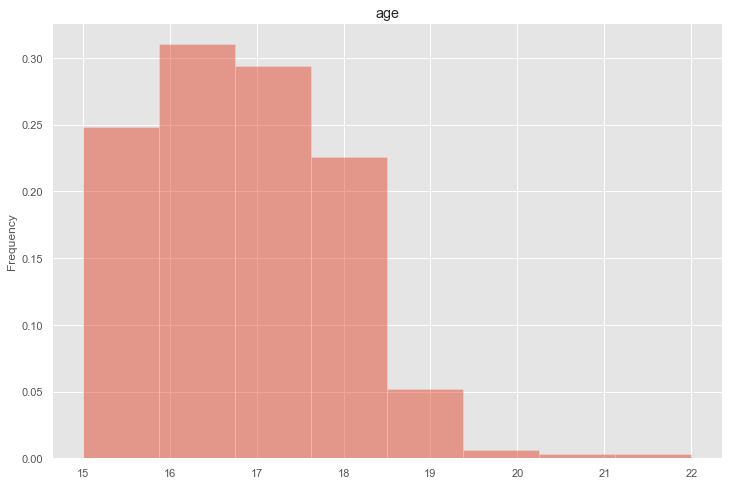

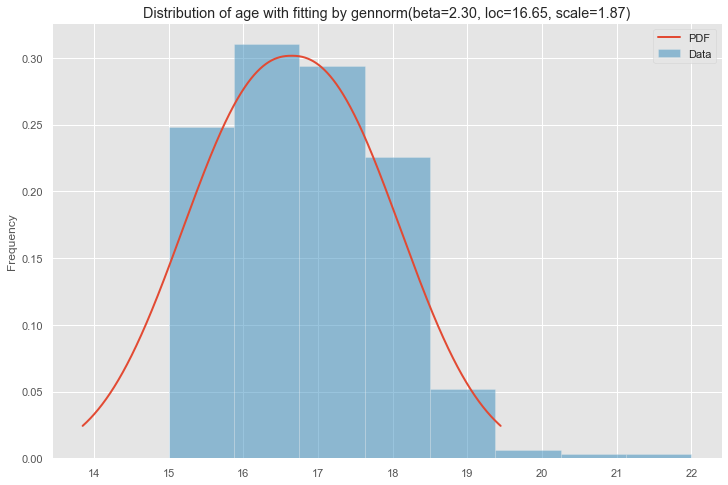

In [76]:
best_fit_name, best_fit_params, best_sse = plot_fit_pdf(data, n_bins=data_stat['age'].nunique())
# plot_fit_pdf(data, n_bins=100)

print("\n")
print("The best fitting distribution is '{}'\n    with parameters: {}\n    and SSR={}."
      .format(best_fit_name, best_fit_params, best_sse))
# SSR (sum of squared residuals)

[15. 16. 17. 18. 19. 20. 21. 22.]
x_min=15.5; x_max=21.5, N_x=7
Distribution fitting: |                                        | 0.0% 0.071 sec. SSE = 0.022487 for 'alpha'.
Distribution fitting: |                                        | 1.0% 0.084 sec. SSE = 0.019512 for 'anglit'.
Distribution fitting: |                                        | 2.1% 0.125 sec. SSE = 0.019512 for 'arcsine'.
Distribution fitting: |#                                       | 3.1% 0.224 sec. SSE = 0.019512 for 'beta'.
Distribution fitting: |#                                       | 4.1% 0.319 sec. SSE = 0.012362 for 'betaprime'.
Distribution fitting: |##                                      | 5.2% 0.375 sec. SSE = 0.012362 for 'bradford'.
Distribution fitting: |##                                      | 6.2% 0.606 sec. SSE = 0.012362 for 'burr'.
Distribution fitting: |##                                      | 7.2% 0.674 sec. SSE = 0.012362 for 'burr12'.
Distribution fitting: |###                             

C:\Users\DNS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


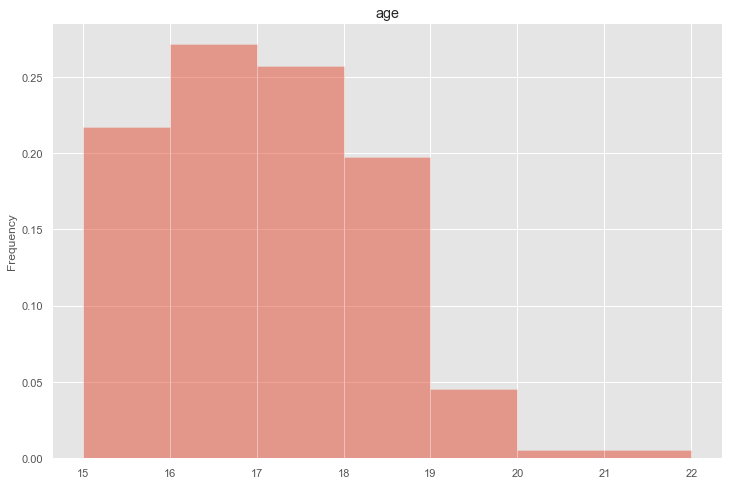

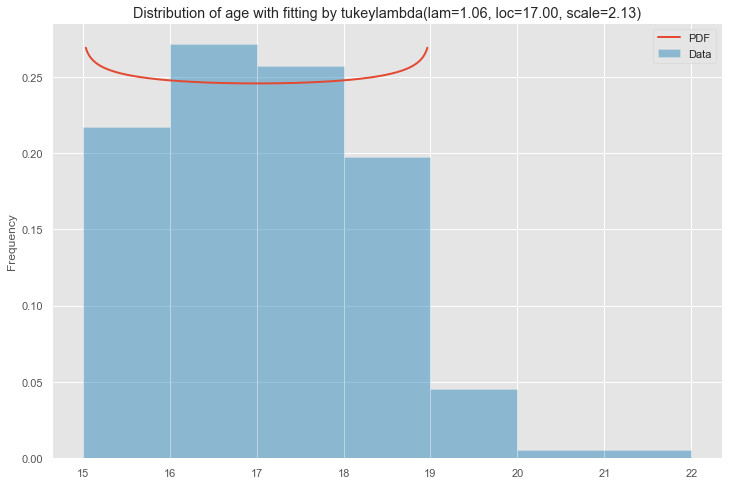

In [77]:
best_fit_name, best_fit_params, best_sse = plot_fit_pdf(data, n_bins=data_stat['age'].nunique()-1)
# plot_fit_pdf(data, n_bins=100)

print("\n")
print("The best fitting distribution is '{}'\n    with parameters: {}\n    and SSR={}."
      .format(best_fit_name, best_fit_params, best_sse))
# SSR (sum of squared residuals)

[15.         15.77777778 16.55555556 17.33333333 18.11111111 18.88888889
 19.66666667 20.44444444 21.22222222 22.        ]
x_min=15.38888888888889; x_max=21.61111111111111, N_x=9
Distribution fitting: |                                        | 0.0% 0.116 sec. SSE = 0.017443 for 'alpha'.
Distribution fitting: |                                        | 1.0% 0.139 sec. SSE = 0.017443 for 'anglit'.
Distribution fitting: |                                        | 2.1% 0.208 sec. SSE = 0.017443 for 'arcsine'.
Distribution fitting: |#                                       | 3.1% 0.378 sec. SSE = 0.017443 for 'beta'.
Distribution fitting: |#                                       | 4.1% 0.539 sec. SSE = 0.017443 for 'betaprime'.
Distribution fitting: |##                                      | 5.2% 0.633 sec. SSE = 0.017443 for 'bradford'.
Distribution fitting: |##                                      | 6.2% 1.033 sec. SSE = 0.017443 for 'burr'.
Distribution fitting: |##                         

C:\Users\DNS\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


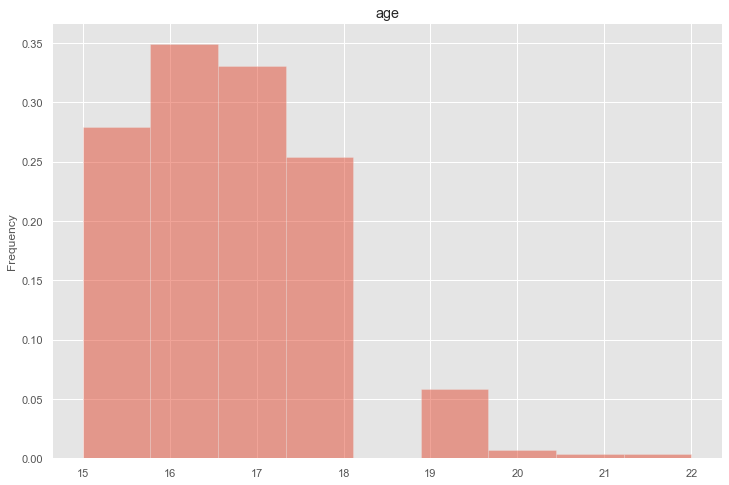

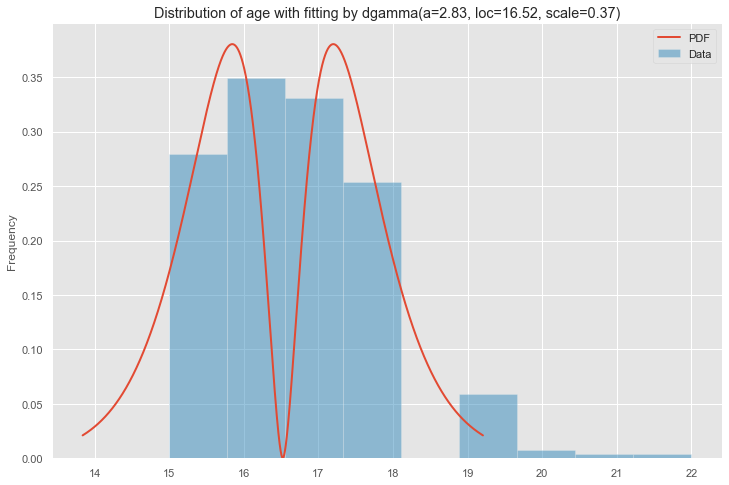

In [78]:
best_fit_name, best_fit_params, best_sse = plot_fit_pdf(data, n_bins=data_stat['age'].nunique()+1)
# plot_fit_pdf(data, n_bins=100)

print("\n")
print("The best fitting distribution is '{}'\n    with parameters: {}\n    and SSR={}."
      .format(best_fit_name, best_fit_params, best_sse))
# SSR (sum of squared residuals)

In [79]:
# df = data_stat
# n_bins_max = 20

# for item in features_numerical:
#     data = df[item]
#     if data.nunique() > n_bins_max:
#         n_bins = n_bins_max
#     else:
#         n_bins = data.nunique()
#     print("There are {} bins for {}.".format(n_bins, item))
#     print(data.value_counts())
#     plot_fit_pdf(data, n_bins=n_bins-1)

The 'absences' feature has 34 unique values and they are:


0.0     74
2.0     60
4.0     52
6.0     30
8.0     20
10.0    17
14.0    12
12.0    12
3.0      7
16.0     7
7.0      6
5.0      5
18.0     5
20.0     4
1.0      3
22.0     3
9.0      3
15.0     2
13.0     2
11.0     2
54.0     1
25.0     1
17.0     1
26.0     1
56.0     1
23.0     1
28.0     1
21.0     1
75.0     1
30.0     1
19.0     1
38.0     1
40.0     1
24.0     1
Name: absences, dtype: int64

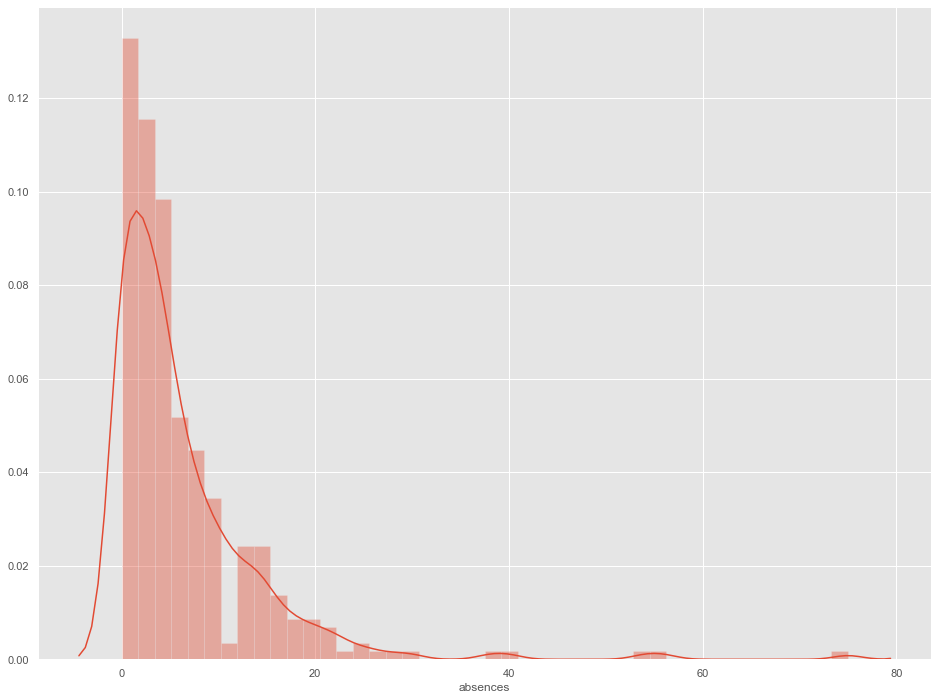

In [80]:
item = 'absences'
data = data_stat[item]
sns.distplot(data)
print("The '{}' feature has {} unique values and they are:".format(item, data_stat[item].nunique()))
data_present[item].value_counts()

In our particular case, the variables that are considered as *numerical* are discrete from the point of view of probability theory and therefore they can be modelled by the probability of a discrete random variable (with *cumulative distribution function (CDF)*).

### 5.2.2. Modelling of the probability of a discrete random variables

We model the probability of a discrete variable as follows:

1. Using `value_counts ()` we arrange the values in descending order of the frequency (although the order is not important).
2. We take the frequency of a certain value as probability.
3. Divide the segment $ [0, 1)$ by segments with lengths equal to probabilities and relate each segment with the corresponding value.
4. Generating a random number by the uniform distribution of `np.randon.rand ()`, we check which segment it belongs to and assume that the corresponding value of the feature appears.

In [81]:
df = data_stat
item = features_categorical[0]
data = df[item]
data.value_counts()

3.0    131
4.0    102
2.0     59
5.0     34
1.0     16
Name: freetime, dtype: int64

In [82]:
# import numpy as np

def prob_ranges(data):
    x = data.value_counts().index
    y = data.value_counts().values
    borders = np.insert(y.cumsum()/y.sum(), 0, 0)
#     borders = [0] + y.cumsum()/y.sum()

    return (x, borders)


def discrete_feature_impute(data):
    values, borders = prob_ranges(data)
    empty_index = data[data.isna() == True].index
#     print("values:", values)
#     print("borders:", borders, "\n")
#     print("empty_index:", empty_index, len(empty_index))
    
    y_model = np.random.rand(len(empty_index))
#     print("y_model:", y_model, len(y_model), "\n")
    
    impute_values = []
    j=0
    for y in y_model:
        j += 1
#         print("\ny =", y, j)
        for k in range(1, len(borders)):
#             print("k, (borders):", k-1, (borders[k-1], borders[k]))
            if borders[k-1] <= y <= borders[k]:
#                 print("! k, (borders):", k-1, (borders[k-1], borders[k]))
                imputer = values[k-1]
                impute_values.append(imputer)
#                 print("    ! bingo ! :", len(impute_values))
#                 print("imputer:", imputer, "\n")
                
#     print("impute_values:", impute_values, len(impute_values))
#     print(type(data))
    
#     print(data[100:105])
    
    new_data = data.copy()
#     print("len(empty_index)", len(empty_index))
    for k, ind in enumerate(empty_index):
#         print(k, ind, impute_values[k])
        new_data[ind] = impute_values[k]
        
#     print("\n")
    
        
    return new_data

In [83]:
print("before:", data.isna().sum())
new_data = discrete_feature_impute(data)
print("after:", new_data.isna().sum())
print(type(new_data))
new_data

before: 8
after: 0
<class 'pandas.core.series.Series'>


0      3.0
1      3.0
2      3.0
3      2.0
4      3.0
      ... 
388    3.0
391    4.0
392    5.0
393    4.0
394    2.0
Name: freetime, Length: 350, dtype: float64

In [84]:
compare_data = pd.DataFrame([data, new_data]).T
compare_data.columns=['before', 'after']
compare_data

,before,after
0,3.0,3.0
1,3.0,3.0
2,3.0,3.0
3,2.0,2.0
4,3.0,3.0
...,...,...
388,3.0,3.0
391,4.0,4.0
392,5.0,5.0
393,4.0,4.0


In [85]:
df = data_stat

data_prob = pd.DataFrame()

for item in df.columns:
    data_prob[item] = discrete_feature_impute(data_pres_stat[item])

data_prob.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
score         0
dtype: int64

Hereafter we will deal with `stud_math_prob` (350 entities, 28 features).

## 5.3 Class imbalance

Finally, we check the class imbalance for the dataset with probabilistic imputation.

In [86]:
def class_imbalance_detect(df, item, class_balance_threshold=3):
    bar_data_sorted = df.groupby(item)[item].count().sort_values()
    class_balance_ratio = round(np.exp(np.log(bar_data_sorted).diff()), 2)
    print(class_balance_ratio)    
    if class_balance_ratio.max() > class_balance_threshold:
        print("It seems to be a severe CLASS IMBALANCE: Maximal Class balance ratio (to previous) is", 
              class_balance_ratio.max(), "\n")
        return item
    else:
        print("Maximal Class balance ratio (to previous) is ", class_balance_ratio.max(), "\n")

In [87]:
imbalanced_features_prob = []
for item in features_one_hot_stat:
    if class_imbalance_detect(data_prob, item) != None:
        imbalanced_features_prob.append(class_imbalance_detect(data_prob, item))

failures
3.0     NaN
2.0    1.10
1.0    3.73
0.0    7.02
Name: failures, dtype: float64
It seems to be a severe CLASS IMBALANCE: Maximal Class balance ratio (to previous) is 7.02 

failures
3.0     NaN
2.0    1.10
1.0    3.73
0.0    7.02
Name: failures, dtype: float64
It seems to be a severe CLASS IMBALANCE: Maximal Class balance ratio (to previous) is 7.02 

famsize
LE3    NaN
GT3    2.4
Name: famsize, dtype: float64
Maximal Class balance ratio (to previous) is  2.4 

famsup
no      NaN
yes    1.52
Name: famsup, dtype: float64
Maximal Class balance ratio (to previous) is  1.52 

reason
other          NaN
home          2.88
reputation    1.10
course        1.24
Name: reason, dtype: float64
Maximal Class balance ratio (to previous) is  2.88 

romantic
yes     NaN
no     2.21
Name: romantic, dtype: float64
Maximal Class balance ratio (to previous) is  2.21 

Mjob
health       NaN
at_home     1.70
teacher     1.06
services    1.74
other       1.29
Name: Mjob, dtype: float64
Maximal Class 

At the modelling stage we should take into account the class imbalnce in features from `imbalanced_features_prob` list:

In [88]:
imbalanced_features_prob

['failures',
 'guardian',
 'nursery',
 'school',
 'higher',
 'address',
 'internet',
 'Pstatus',
 'schoolsup',
 'Fjob']

And here the list of *One-Hot* features without class imbalance:

In [89]:
set(features_one_hot_stat) - set(imbalanced_features_prob)

{'Mjob', 'activities', 'famsize', 'famsup', 'reason', 'romantic', 'sex'}

# 6. Data transformation

## 6.0 *dtype* transformation

In [90]:
for item in features_numerical:
    print(item, "\n", data_prob[item].value_counts().index, "\n")
    
for item in features_ordinal:
    print(item, "\n", data_prob[item].value_counts().index, "\n")

age 
 Int64Index([16, 17, 15, 18, 19, 20, 22, 21], dtype='int64') 

absences 
 Float64Index([ 0.0,  2.0,  4.0,  6.0,  8.0, 10.0, 14.0, 12.0,  3.0, 16.0,  7.0,
               5.0, 18.0, 20.0, 22.0,  1.0,  9.0, 15.0, 13.0, 25.0, 11.0, 54.0,
              17.0, 26.0, 23.0, 24.0, 28.0, 21.0, 75.0, 30.0, 19.0, 38.0, 40.0,
              56.0],
             dtype='float64') 

studytime 
 Float64Index([2.0, 1.0, 3.0, 4.0], dtype='float64') 

freetime 
 Float64Index([3.0, 4.0, 2.0, 5.0, 1.0], dtype='float64') 

Fedu 
 Float64Index([2.0, 3.0, 4.0, 1.0, 0.0], dtype='float64') 

goout 
 Float64Index([3.0, 2.0, 4.0, 5.0, 1.0], dtype='float64') 

health 
 Float64Index([5.0, 3.0, 4.0, 1.0, 2.0], dtype='float64') 

traveltime 
 Float64Index([1.0, 2.0, 3.0, 4.0], dtype='float64') 

famrel 
 Float64Index([4.0, 5.0, 3.0, 2.0, 1.0], dtype='float64') 

Medu 
 Float64Index([4.0, 3.0, 2.0, 1.0, 0.0], dtype='float64') 



We change the `dtype` of *numerical* and *ordinal* features with `int`.

In [91]:
for item in features_numerical:
    data_prob[item] = data_prob[item].astype('int')
    
for item in features_ordinal:
    data_prob[item] = data_prob[item].astype('int')
    
data_prob['score'] = data_prob['score'].astype('int')

## 6.1 Transformation of *One-Hot* features

We transform *One-Hot* features into *dummy*-variables, dropping one *dummy*-variable to avoid the *dummy-variable-trap*.

In [92]:
data_prob_dummies = pd.get_dummies(data_prob, columns=features_one_hot_stat, drop_first=True)
data_prob_dummies.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime',
       'goout', 'health', 'absences', 'score', 'failures_1.0', 'failures_2.0',
       'failures_3.0', 'famsize_LE3', 'famsup_yes', 'reason_home',
       'reason_other', 'reason_reputation', 'romantic_yes', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'guardian_mother',
       'guardian_other', 'nursery_yes', 'school_MS', 'higher_yes',
       'activities_yes', 'address_U', 'internet_yes', 'Pstatus_T', 'sex_M',
       'schoolsup_yes', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher'],
      dtype='object')

In [93]:
data_prob_dummies.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 394
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                350 non-null    int32
 1   Medu               350 non-null    int32
 2   Fedu               350 non-null    int32
 3   traveltime         350 non-null    int32
 4   studytime          350 non-null    int32
 5   famrel             350 non-null    int32
 6   freetime           350 non-null    int32
 7   goout              350 non-null    int32
 8   health             350 non-null    int32
 9   absences           350 non-null    int32
 10  score              350 non-null    int32
 11  failures_1.0       350 non-null    uint8
 12  failures_2.0       350 non-null    uint8
 13  failures_3.0       350 non-null    uint8
 14  famsize_LE3        350 non-null    uint8
 15  famsup_yes         350 non-null    uint8
 16  reason_home        350 non-null    uint8
 17  reason_other    

## 6.2 Transformation of *Ordinal* features

It is not required in this project.

In [94]:
# data_prob[features_ordinal]
data_prob_dummies[features_ordinal]

,studytime,freetime,Fedu,goout,health,traveltime,famrel,Medu
0,2,3,4,4,3,2,4,4
1,2,3,1,3,3,1,5,1
2,2,3,1,2,3,1,4,1
3,3,2,2,2,5,1,3,4
4,2,3,3,2,5,1,4,3
...,...,...,...,...,...,...,...,...
388,2,3,1,4,1,1,4,3
391,1,4,1,5,2,2,2,3
392,1,5,1,3,3,1,5,1
393,1,4,2,1,5,3,4,3


# 99 Summary

The given table contained 395 entities with 30 features. Many of them contained missing values. There was a feature `studytime, granular` without description.

**No duplicates**.

The **target Feature** is `score`.

**Deleted Entities**:

- with missing values in target feature (`score`) (6), since we need true information about target feature.
- with anomal value (=0) in target features (37), since this information is about students who did not pass the exam. Does student pass exam or not is a classification problem, but it is not about the prediction exam score.
- with anomal values of `absences` (2), since they are improper outliers in distribution.

We made 2 **anomaly imputation**:
1. `Fedu` (education of father). The outlier with the absurd value of `40` is replaced by `4` (the possible values of the feature are [1, 2, 3, 4, 5]). Most likely, this is a typo.
2. `famrel` (family relations). The outlier with the absurd value of `-1` is replaced by `1` (the possible values of the feature are [1, 2, 3, 4, 5]). Most likely, this is a typo.

**Removed features**:
- `paid`, since statistical analysis showed that its classes have the same distribution.
- `studytime, granular`, since it is correlated perfectly with` studytime` (correlation coefficient = -1).

Other **missing values are replaced** according to the modeling distributions of relevant features.

*One-Hot* features are investigated for class imbalance. **The list of features suspected for imbalance of classes** is in the `imbalanced_features_prob list`.

**The dtype** of numerical and ordinal variables is changed to `int`.

***One-Hot* variables are transformed into *dummy* variables** (with dropping away one of the *dummy* variables to avoid *dummy-variable-trap*.)

**The data prepared for creating a model are in the dataset `stud_math_prob_dummies`.**

## 99.1 Notes

The linear regression model can fail due to the possible nonlinear dependence mentioned above.

The feature `failures` is defined as the number of extracurricular failures ($n \,{\rm if}\, 1 \leq n < 3, {\rm otherwise}\, 0$.) Both if there are 0 failures, or more than 3, the feature will be equal to 0. This is not an `ordinal`, but an `one-hot` feature.

**Important!** The grades are a multiple of 5, and this fact must be taken into account at the stages of when predicting and validating. In particular, the predictions of model can be rounded with modulo operation with number 5.

The forecast "will the person pass the exam or not" is a classification problem, but not a regression, and requires other approaches and other models.

<div style="border:solid blue 2px; padding: 20px"> <h3 style="color:blue; margin-bottom:20px">List of DataFrames</h3>
    
| DataFrames | Description | Comments |
| :-- | :-- | :-- |
| *stud_math* | *Initial data*: 30 features x 395 entries. <br/> *Drop target missing values*: 30 features x 389 entries |  |
| *stud_math_absent* | *Only target anomalies(=0)*: 30 features x 37 entries | Who missed  exam |
| **stud_math_present** | *Drop* 37 *target* anomalies (=0): 30 features x 352 entries <br/> *Drop* 2 *'absences'* anomalies (>100): 30 features x 350 entries | Who was present at exam |
| *stud_math_pres_simplest* | *Drop features* with indistinguishable classes: 23 features x 350 entries | According to the *useless_variables_simplest* list |    
| **stud_math_pres_stat** | *Drop feature* with indistinguishable classes (*paid*): 29 features x 350 entries <br/> *Drop 'studytime, granular* which is absolutely correlated with *'studytime*: 28 features x 350 entries | According to the *useless_variables_stat* list |
| *stud_math_const* | Missing values are imputed with constants: 28 features x 350 entries | From *stud_math_pres_stat* |
| **stud_math_prob** | Missing values are imputed via probability distribution: 28 features x 350 entries | From *stud_math_pres_stat* |
| **stud_math_prob_dummies** | *One-Hot* features are substituted with *dummy*-variables | *Dummy*-trap is avoided |


<h3 style="color:blue; margin-bottom:20px">List of Lists</h3>

| List | Description | Comments |
| :-- | :-- | :-- |
| features_numerical | Numerical features |  |
| features_categorical | Categorical features | *features_ordinal* $\cup$ *features_one_hot* |
| features_ordinal | Ordinal features | Subset of *features_categorical* |
| features_one_hot | One Hot features | Subset of *features_categorical* |
| features_one_hot_stat | One Hot features | *features_one_hot* without *useless_variables_stat* |
| imbalance_features | One-Hot features suspected in class imbalance | Class imbalance threshold is included as last element (dict) |
| useless_variables_simplest | One-Hot features with indistinguishable classes | To drop from dataset according to the *simplest* method of class distribution comparison |
| features_one_hot_simplest | One-Hot features with distinguishable classes | According to the *simplest* method of class distribution comparison |
| useless_variables_stat | One-Hot features with indistinguishable classes | To drop from dataset according to the *statistical* method of class distribution comparison |

**What can be done more (in future)**:

- We can solve the classification problem "will the person pass the exam or not".

In [95]:
dt = time.time() - total_time_start

hours = dt//3600
minutes = ( dt - 3600*hours) // 60
seconds = dt - 3600*hours - 60*minutes

def two_digit_presentation(x):
    if x < 10:
        return "0" + str(x)
    else:
        return str(x)

if hours > 0:
    print("\n"*3, "The full performance time is  " 
          + two_digit_presentation(int(hours))
          +  " h " + two_digit_presentation(int(minutes)) 
          + " min " + two_digit_presentation(int(seconds)) + " sec.")
elif minutes > 0:
    print("\n"*3, "The full time of performance is  " 
          +two_digit_presentation(int(minutes)) 
          + " min " + two_digit_presentation(int(seconds)) + " sec.")
else:
    print("\n"*3, "The full time of performance is  " 
          + two_digit_presentation(round(seconds, 3)) + " sec.")




 The full time of performance is  01 min 56 sec.
